In [1]:
##### Code catlog 
##### 12/09/2023 - Organize from One-node-final folder. Github has another final version, compare and update later 
#####                          
import scipy
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations
import time
import random
from scipy.stats import beta
import pandas as pd
import copy
%matplotlib inline
#%run pure_strategy_selection.ipynb  #include simple selection algorithm
import scipy.io
import collections
import sys
from itertools import count


## Mathmatic Functions

In [2]:
import numpy as np

# centers the opinion vector around 0\n",
def mean_center(op, n):
    ones = np.ones((n, 1))
    x = op - (np.dot(np.transpose(op),ones)/n) * ones
    return x
    
# compute number of edges, m\n
def num_edges(L, n):
    m = 0
    for i in range(n):
        for j in range(n):
            if i > j and L[i,j] < 0:
                m += 1            
    return m
def rank(scores,agent):
    ranks =1
    for i in scores:
        if scores[agent] > scores[i]:
            ranks += 1
        elif scores[agent]  == scores[i]:
            ranks = ranks
    return ranks

# maximizing polarization only: \\bar{z}^T \\bar{z}   
def obj_polarization(A, L, op, n):
    op_mean = mean_center(op, n)
    z_mean = np.dot(A, op_mean) 
    return np.dot(np.transpose(z_mean), z_mean)[0,0] 

# def obj_polarization_1(A, L, op, n):  #z_mean is the same as s_mean - according to Stanford paper theory
#     z = np.dot(A, op) 
#     z_mean = mean_center(z, n)
#     return np.dot(np.transpose(z_mean), z_mean)[0,0] 

# Calculate innate polarization
def obj_innate_polarization(s, n):  
#     np.set_printoptions(precision=5)
    op_mean = mean_center(s, n)
    return np.dot(np.transpose(op_mean), op_mean)[0,0]
# Parameters for the network


def network_anl(s,n,G,agent):

    print(str(agent)+' opinion: ' + str(s[agent]))
    print(str(agent)+' neighbors: '+ str(np.nonzero(G[agent])))

    s_aa = s[:, 0]
    my_dict = {index: value for index, value in enumerate(s_aa)}
    sorting_s = sorted(my_dict.items(), key=lambda x:x[1])
    sorted_S = dict(sorting_s)
    res = rank(sorted_S,agent)
    # printing result 
    print("Opinion rank of this agent is : " + str(res))



    #print("___________________Max Analyze__________________________________________")
    nxG = nx.from_numpy_matrix(G) 
    # G = nx.karate_club_graph()
    print("_______________Degree Centrality___________________")  
    deg_centrality = nx.degree_centrality(nxG)
    sortedDict = sorted(deg_centrality.items(), key=lambda x:x[1])
    converted_dict = dict(sortedDict)
    res1 = rank(converted_dict,agent)
    print("rank of this agent is : " + str(res1))
    print(converted_dict[agent])

    # print(converted_dict)
    print("                           ")
    print("_______________Closeness Rank________________________")
    close_centrality = nx.closeness_centrality(nxG)
    sortedDict1 = sorted(close_centrality.items(), key=lambda x:x[1])
    converted_dict1 = dict(sortedDict1)
    res2 = rank(converted_dict1,agent)
    print("rank of this agent is : " + str(res2))
    print(converted_dict1[agent])
    # print(converted_dict1)
    print("                           ")
    print("_______________Page Rank_____________________________")
    pr = nx.eigenvector_centrality(nxG)
    sortedDict3 = sorted(pr.items(), key=lambda x:x[1])
    converted_dict3 = dict(sortedDict3)
    res3 = rank(converted_dict3,agent)
    print("rank of this agent is : " + str(res3))
    print(converted_dict3[agent])
    # print(converted_dict3)

    print("                           ")

    def gap(op, n):
        ones = np.ones((n, 1))
        x = op - (np.dot(np.transpose(op),ones)/n) * ones
        return x

    gap = gap(s,n)
    if gap[agent] < 0:
        my_gap = {index: value for index, value in enumerate(gap) if value<0}
        sorting_gap = sorted(my_gap.items(), key=lambda x:x[1])
        sorted_gap = dict(sorting_gap)
        temp4 = list(sorted_gap.items()) 
        res4 = [idx for idx, key in enumerate(temp4) if key[0]==agent][0]+1
        print("Agent's opinion extremity is ranked as: " + str(res4))
    else:
        my_gap = {index: value for index, value in enumerate(gap) if value>=0}
        sorting_gap = sorted(my_gap.items(), key=lambda x:x[1], reverse=True)
        sorted_gap = dict(sorting_gap)
        temp4 = list(sorted_gap.items()) 
        res4 = [idx for idx, key in enumerate(temp4) if key[0]==agent][0]+1
        print("Agent's opinion extremity is ranked as: " + str(res4))
    print("Agent's min_pref is ranked as: " + str(res4+res1))
np.set_printoptions(precision=3)

## Creating Network
### 1. Import Network

In [9]:
#%run sync_net3.ipynb
#%run sync_net4.ipynb
#%run Karate.ipynb
%run Reddit.ipynb
#%run Twitter.ipynb


File path: C:\Users\xzhan176\OneDrive\Misinfo Paper\12092023_PoGame\data\Reddit.mat


### 2. Network Visualization

<Figure size 2000x2000 with 0 Axes>

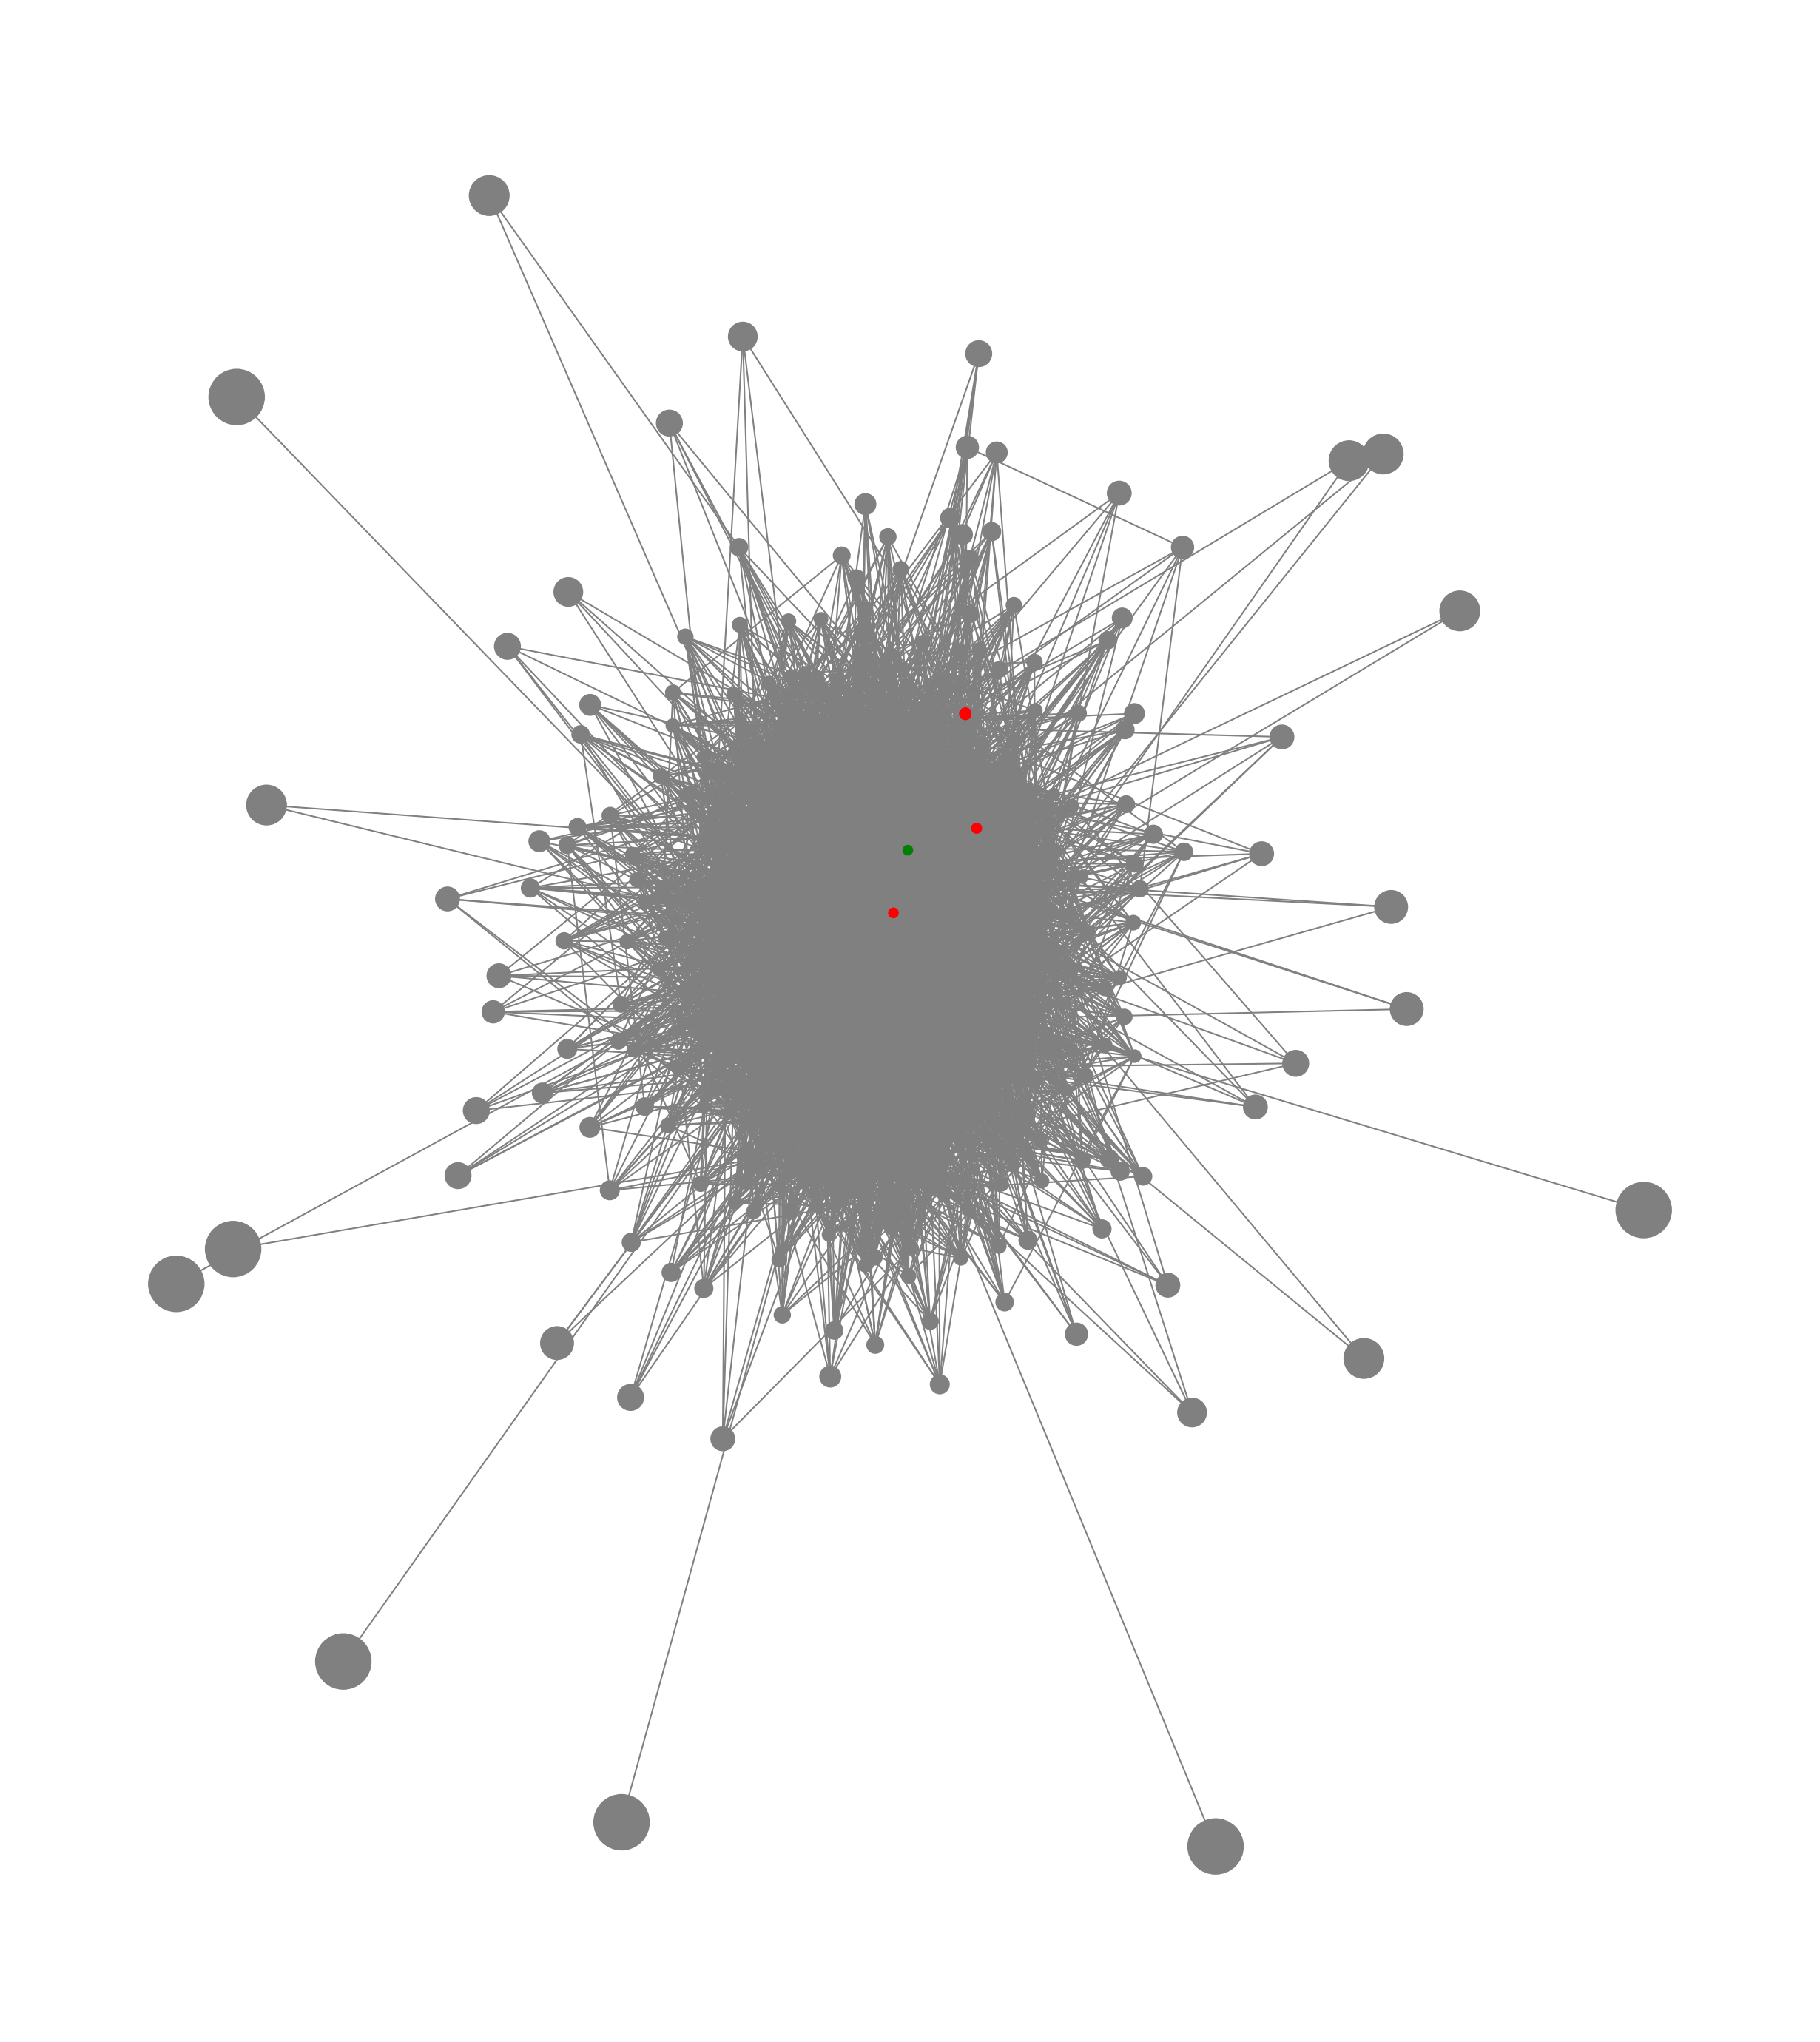

In [19]:
############################ Make Innate Opinion ################################
##create two set of weights connected with density 1) inviduals  2) individual & informaton Source
# print(s)
s_use = s.flatten()   # Convert array to a list for later operation
s_use = s_use.tolist()
new_s = [i * 30 for i in s_use]
df = pd.DataFrame(new_s, columns=['Opinion']) #create a datafram with index at column 1, opinion at column 2

######################### Calculate Key Values & Visualization #######################################3
L = scipy.sparse.csgraph.laplacian(G, normed=False)  # Return the Laplacian matrix
A = np.linalg.inv(np.identity(n) + L)  # A = (I + L)^(-1)\n  Stanford paper theory
m = num_edges(L, n)                    # call the function to calculate the number of edges
columnsum_ij = np.sum(A, axis=0)
nxG = nx.from_numpy_array(G)          
plt.figure(figsize=(20, 20))

def node_edge(G, n):
    edges =[]
    for v in range(n):
        a = np.array(np.nonzero(G[v])[0])
        edge = len(a)
#         print(edge)
        edges.append(edge)
        
    return edges

node_edges = node_edge(G, n)
# node_sizes = node_edges*10

min_equi =[48]
max_equi=[156,266,363]

# create color map
color_map = []
for node in nxG:
    if node in min_equi:
        color_map.append('green')
    elif node in max_equi: 
        color_map.append('Red')  
    else:
        #color_map.append('#1f77b4')  
        color_map.append('grey') 


# create node color map value
s_use = s.flatten()
s_use = s_use.tolist()
new_s = [i * 30 for i in s_use]
df = pd.DataFrame(new_s, columns=['Opinion'])

# crete node sizes
node_sizes =[]
for i in node_edges:
    node_size = 1/i*300
    node_sizes.append(node_size)
# print(node_sizes)


# draw graph - visualize the network in high resolution
plt.figure(figsize=(8, 9), dpi=300)  # Set the DPI for high resolution
# draw subgraph for highlights
my_pos = nx.spring_layout(nxG, k=0.3, seed = 2)
#my_pos = nx.spring_layout(nxG, seed = 2)
#nx.draw_networkx(G, pos=pos, font_size=16, node_color='blue', font_color='white')
#nx.draw(nxG, pos= my_pos,with_labels=False, node_color=df['Opinion'].astype(int), cmap=plt.cm.Blues,node_size= node_sizes, edge_color='grey', width=0.5, font_color='black',font_size=12, font_weight='bold', alpha=0.9)
nx.draw(nxG, pos = my_pos, with_labels=False, node_color=color_map, node_size= node_sizes, edge_color='grey', width=0.5, font_color='white',font_size=9, font_weight='bold')

sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin = 0, vmax=1))
#cbar = plt.colorbar(sm, shrink = 0.5)
tick_font_size = 16
cbar.ax.tick_params(labelsize=tick_font_size)
plt.show()

## 3. Network Property Visualization

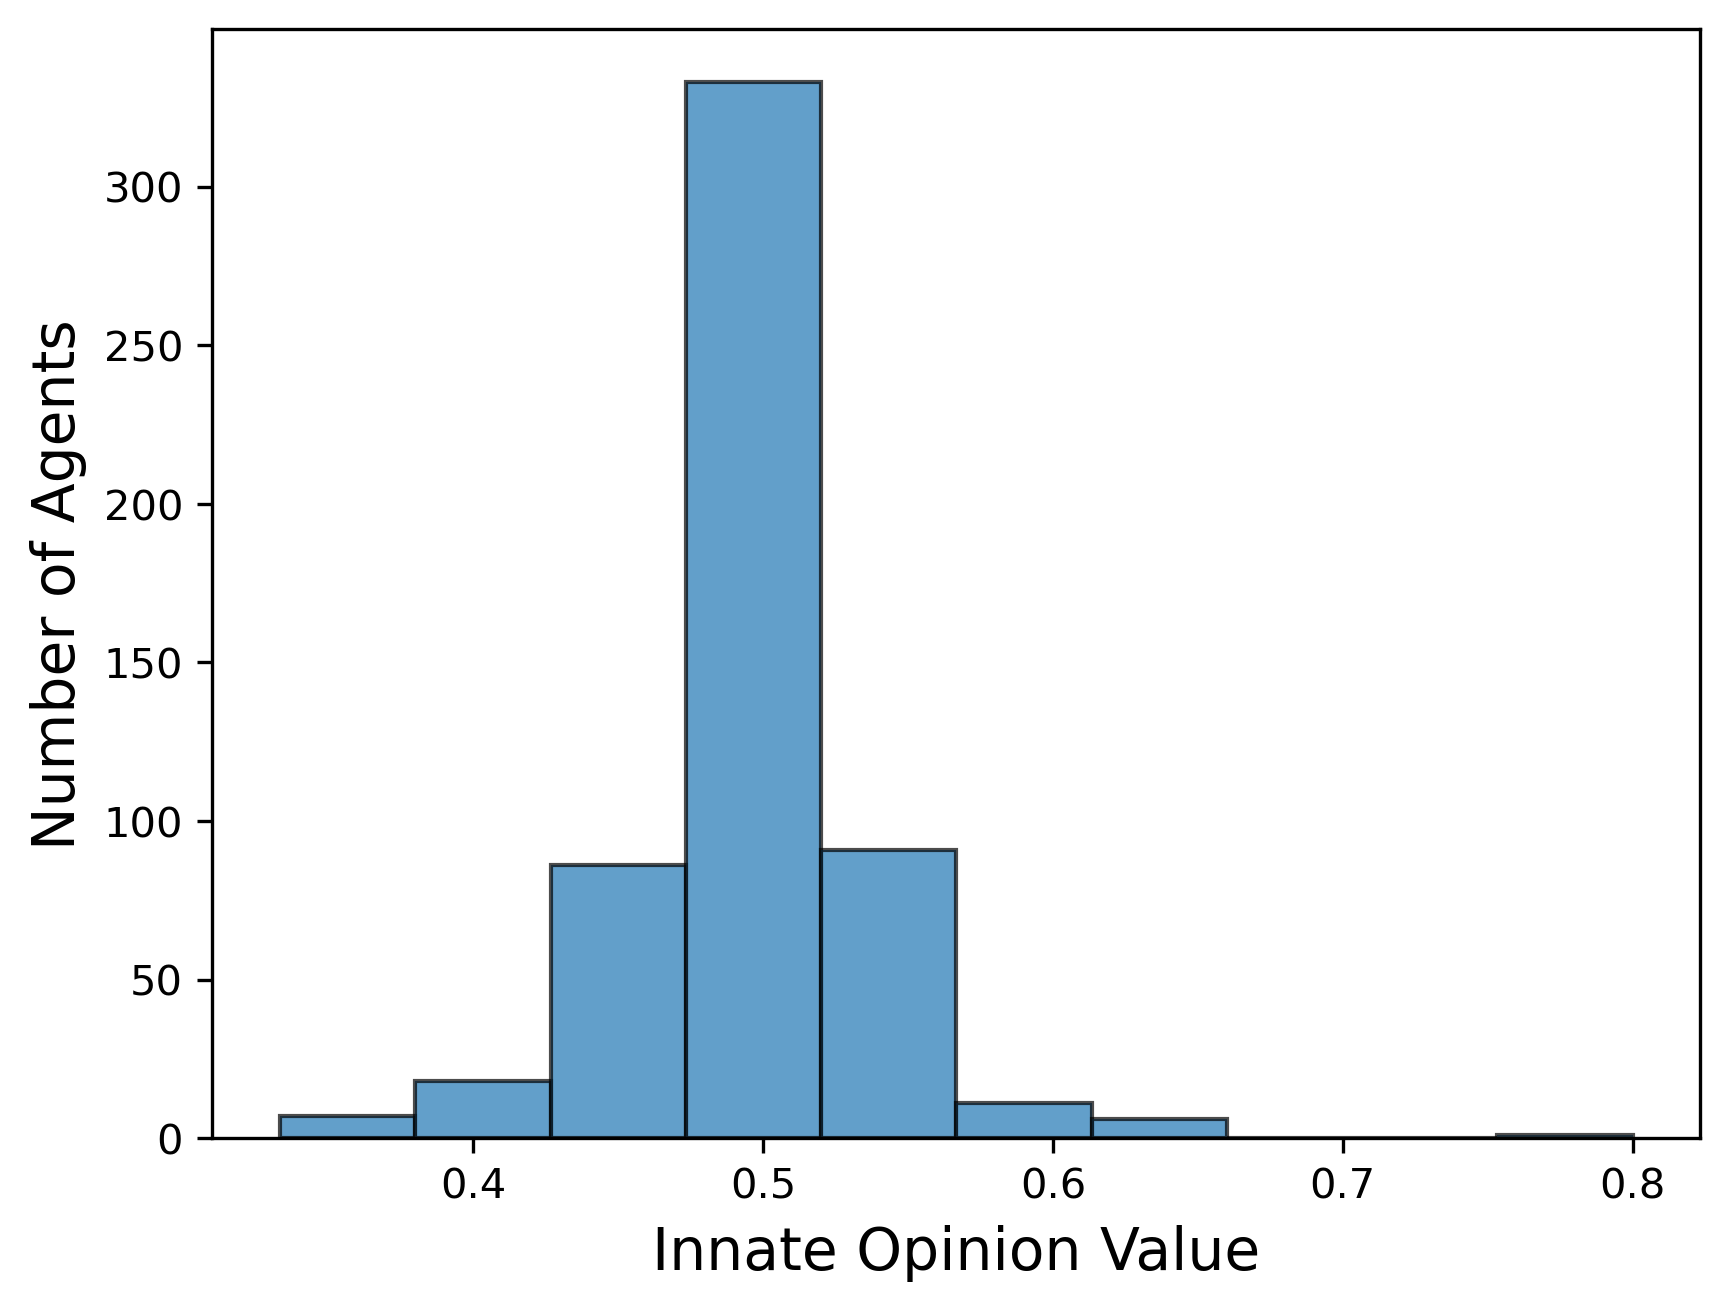

In [6]:
plt.figure(dpi=300)
# Create a histogram
plt.hist(s, bins=10, edgecolor='black', alpha=0.7)
# new_list = range(0, 3)
#plt.ylim(0,8)
#plt.yticks(range(0, 10, 2))
#Add labels and title
plt.xlabel('Innate Opinion Value',fontsize=14)
plt.ylabel('Number of Agents',fontsize=14)
# Save the figure as a high-quality PNG image
#plt.savefig('Karate Opinion All Games.png', dpi=800)
#plt.savefig('Reddit Opinion All Games.png', dpi=800)
#plt.savefig('Twitter_opinion_histograms.png', dpi=800)  # Adjust dpi for higher quality


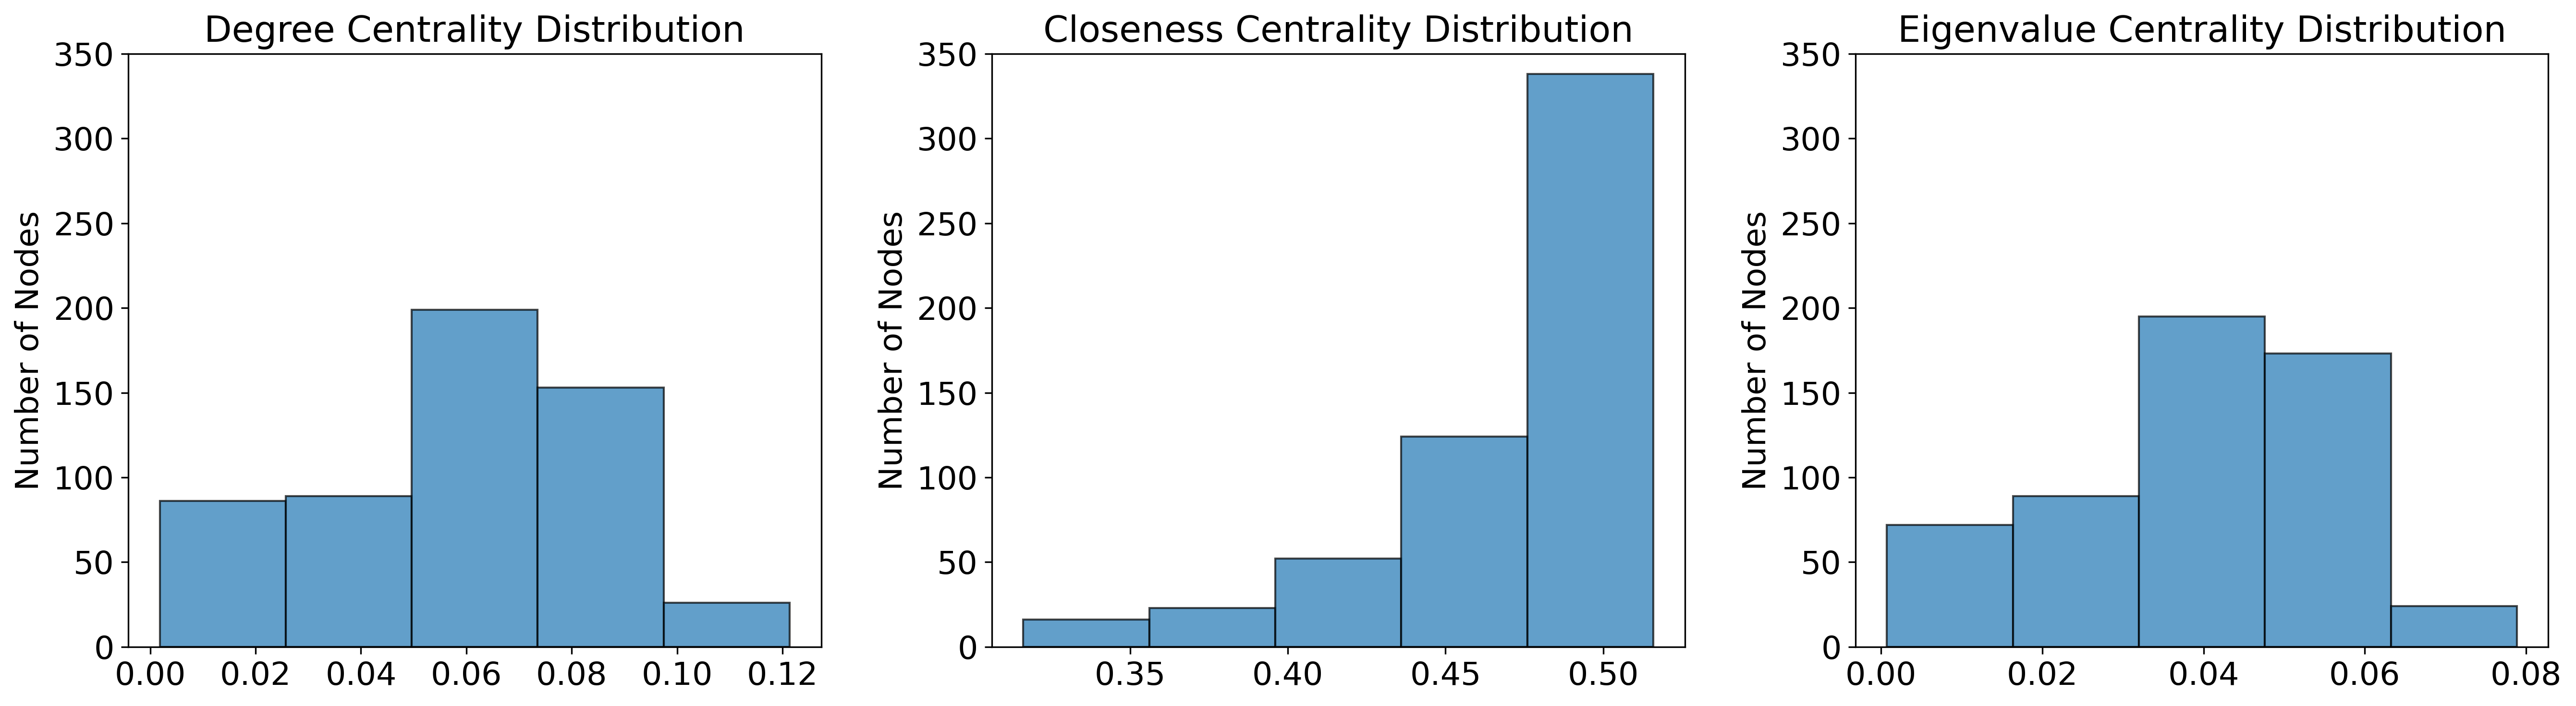

In [22]:


import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Calculate centrality measures
degree_centrality = nx.degree_centrality(nxG)
closeness_centrality = nx.closeness_centrality(nxG)
eigenvector_centrality = nx.eigenvector_centrality(nxG)

# Convert dictionaries to Pandas DataFrames
degree_df = pd.DataFrame(list(degree_centrality.values()), columns=['Degree Centrality'])
closeness_df = pd.DataFrame(list(closeness_centrality.values()), columns=['Closeness Centrality'])
eigenvector_df = pd.DataFrame(list(eigenvector_centrality.values()), columns=['Eigenvalue Centrality'])


# Plot histograms of centrality measures in a horizontal layout
fig, axs = plt.subplots(1, 3, figsize=(18, 5), dpi=300)  # Set DPI to 300 for higher resolution


# Degree Centrality Histogram
axs[0].hist(degree_df['Degree Centrality'], bins=5, edgecolor='black', alpha=0.7)
#print(degree_df['Degree Centrality'])
axs[0].set_title('Degree Centrality Distribution',fontsize=18)
#axs[0].set_xlabel('Degree Centrality')
axs[0].set_ylabel('Number of Nodes',fontsize=16)
axs[0].set_ylim(0, max(len(degree_df), len(closeness_df), len(eigenvector_df)))
#for Reddit visualization
axs[0].set_ylim(0,350)
axs[0].tick_params(axis='x', labelsize=16)  # Font size for x-axis tick labels
axs[0].tick_params(axis='y', labelsize=16)  # Font size for y-axis tick labels


# Closeness Centrality Histogram
axs[1].hist(closeness_df['Closeness Centrality'], bins=5, edgecolor='black', alpha=0.7)
axs[1].set_title('Closeness Centrality Distribution',fontsize=18)
#axs[1].set_xlabel('Closeness Centrality')
axs[1].set_ylabel('Number of Nodes',fontsize=16)
axs[1].set_ylim(0, max(len(degree_df), len(closeness_df), len(eigenvector_df)))
#for Reddit visualization
axs[1].set_ylim(0,350)
axs[1].tick_params(axis='x', labelsize=16)  # Font size for x-axis tick labels
axs[1].tick_params(axis='y', labelsize=16)  # Font size for y-axis tick labels


# Eigenvalue Centrality Histogram
axs[2].hist(eigenvector_df['Eigenvalue Centrality'], bins=5, edgecolor='black', alpha=0.7)
axs[2].set_title('Eigenvalue Centrality Distribution',fontsize=18)
#axs[2].set_xlabel('Eigenvalue Centrality')
axs[2].set_ylabel('Number of Nodes',fontsize=16)
axs[2].set_ylim(0, max(len(degree_df), len(closeness_df), len(eigenvector_df)))
#for Reddit visualization
axs[2].set_ylim(0,350)
#axs[2].set_xticklabels(['{:.1f}'.format(x) for x in axs[0].get_xticks()])  # Set x-axis precision to 1
# Setting font size for tick labels on both axes
axs[2].tick_params(axis='x', labelsize=16)  # Font size for x-axis tick labels
axs[2].tick_params(axis='y', labelsize=16)  # Font size for y-axis tick labels

plt.tight_layout()
# Save the figure as a high-quality PNG image
#plt.savefig('Reddit_centrality_histograms.png', dpi=800)  # Adjust dpi for higher quality

plt.show()




In [27]:
# minimizer: 4899 (pure).


# maximizer: (same as before)
# 314 = agent 156
# 434 = agent 266
# 728 = agent 363

network_anl(s,n,G,363)

# print(s)
print("__Maximum opinion")
print(max(s))
print("__Minimum opinion_")
print(min(s))

363 opinion: [0.5]
363 neighbors: (array([ 11,  23,  32,  34,  48,  61,  84,  97,  99, 101, 133, 143, 146,
       196, 198, 199, 209, 225, 239, 278, 288, 291, 295, 312, 365, 372,
       376, 384, 402, 407, 423, 428, 439, 444, 450, 465, 471, 473, 500,
       505, 506, 515, 531, 547, 552], dtype=int64),)
Opinion rank of this agent is : [332]
_______________Degree Centrality___________________
rank of this agent is : [446]
0.08152173913043478
                           
_______________Closeness Rank________________________
rank of this agent is : [486]
0.4977457168620379
                           
_______________Page Rank_____________________________
rank of this agent is : [507]
0.05929622165274248
                           
Agent's opinion gap to mean opinion is ranked as: [195]
__Maximum opinion
[0.8]
__Minimum opinion_
[0.333]


In [69]:
# print("_______________Page Rank_____________________________")
# pr = nx.eigenvector_centrality(nxG)
# sortedDict3 = sorted(pr.items(), key=lambda x:x[1])
# converted_dict3 = dict(sortedDict3)
# temp3 = list(converted_dict3.items()) 
# print(temp3)
# res3 = [idx for idx, key in enumerate(temp3) if key[0]==agent]
# print("rank of this agent is : " + str(res3))
# print(converted_dict3[agent])

In [70]:
# print("___________________Max Analyze__________________________________________")

# nxG = nx.from_numpy_matrix(G) 
# # G = nx.karate_club_graph()
# print("_______________Degree Centrality_____________________________")  
# plt.figure(figsize =(15, 15))
# deg_centrality = nx.degree_centrality(nxG)
# sortedDict = sorted(deg_centrality.items(), key=lambda x:x[1])
# converted_dict = dict(sortedDict)
# print(converted_dict)
# print("                           ")
# print("_______________Closeness Rank_____________________________")
# close_centrality = nx.closeness_centrality(nxG)
# sortedDict1 = sorted(close_centrality.items(), key=lambda x:x[1])
# converted_dict1 = dict(sortedDict1)
# print(converted_dict1)
# print("                           ")
# print("_______________Page Rank_____________________________")
# pr = nx.eigenvector_centrality(nxG)
# sortedDict3 = sorted(pr.items(), key=lambda x:x[1])
# converted_dict3 = dict(sortedDict3)
# print(converted_dict3)

# print("                           ")

# def gap(op, n):
#     ones = np.ones((n, 1))
#     x = op - (np.dot(np.transpose(op),ones)/n) * ones
#     return abs(x)

# gap = gap(s,n)
# my_gap = {index: value for index, value in enumerate(gap)}
# sorting_gap = sorted(my_gap.items(), key=lambda x:x[1])
# sorted_gap = dict(sorting_gap)
# print(sorted_gap)



### 4. Equilibrium & Polarization  - based on derivation
$$P(z) = z ^T * z $$


In [71]:

## s =  make_innat_opinions(n, c1)
# print('Innate Opinion')
# print(s)
# print('Equilibrium Opinion')
# print(np.dot(A, s))

op = s
y = mean_center(s,n)
# print(y)
innat_pol = np.dot(np.transpose(y), y)[0,0] 
print('Innate_polarization:')
print(innat_pol)

# Test equilibrium polarization
equ_pol = obj_polarization(A, L, s, n)
print('Equi_polarization:')
print(equ_pol)

di = equ_pol-innat_pol
print("Difference:")
print(di)

Innate_polarization:
3.544423221641313
Equi_polarization:
0.16642398715292875
Difference:
-3.3779992344883842


### Testing players' behavior

In [72]:
def random_play(s,n):  # player randomly choose an agent and randomly change the agent
    
    op = copy.copy(s)
  
    v = random.randint(0,n-1)  # randomly select an agent index
#     print(v)
    new_op = random.randint(0, 1)  # randomly select an opininon between 0 and 1
#     print(new_op)
    
    # Store old opinion
    old_opinion = op[v,0]
    
    #update the opinion
    op[v,0] = new_op 
#     print('Only 1 opinion changed')
#     print(op)
    print("    "+"Agent" + str(v) +" 's opinion " + str(old_opinion) + " changed to "+ str(new_op))
    por = obj_polarization(A, L, op, n)
    
    #restore op op array to innate opinion
    op[v] = old_opinion
    print("Network reaches equilibrium Polarization: " + str(por))
#     print('Should be restored')
#     print(op)
    return (v, new_op, por)





In [73]:
def random_play1(s,n):  # player randomly choose an agent and randomly change the agent
    
    op = copy.copy(s)
#     max_opi_option = random.uniform(0, 1)   # options that maximizer have
    
    v = random.randint(0,n-1)  # randomly select an agent index
#     print(v)
#     v = 1
    new_op = random.uniform(0, 1)  # randomly select an opininon between 0 and 1
    #new_op = 0
#     print(new_op)
    
    # Store old opinion
    old_opinion = op[v,0]
    
    #update the opinion
    op[v,0] = new_op 
#     print('Only 1 opinion changed')
#     print(op)
    print("    "+"Agent" + str(v) +" 's opinion " + str(old_opinion) + " changed to "+ str(new_op))
    por = obj_polarization(A, L, op, n)
    
    #restore op op array to innate opinion
    op[v] = old_opinion
    print("Network reaches equilibrium Polarization: " + str(por))
#     print('Should be restored')
#     print(op)
    return (v, new_op, por)





In [74]:
## Testing to see if random_play works -- NO NEED TO RUN
# min_touched =[]
# (v1, maxmize_op, innat_equi_por, max_por) = choose_max_vertex(s, n, min_touched)
# print(v1, maxmize_op, innat_equi_por, max_por)

In [75]:
## Testing to see if random_play works -- NO NEED TO RUN
# (v1, max_opinion, max_pol) = random_play(s,n)
# (v2, min_opinion, min_pol) = random_play(s,n)

In [76]:
def maximizer_fir_play(s,n,min_touched):    # maxmizer first-time play, greedy algorithm
    op = copy.copy(s)

    print('Maximizer Play')

    max_champion = choose_max_vertex(op, n, min_touched) # The best choice among all opinions and vertexs, function is in "pure_strategy_selection.ipynb"
    (v1, max_opinion, innate_obj, max_pol) = max_champion # find agent v1, and max_opinion that can maxmize the equi_polarization(max_pol)

    if v1 == None:   # if maximizer cannot find one
        print('Maximizer fail')

    else:
        print("                                ")
        print("Maximizer finds its target agent:")
#         print('v1', 'changed_opinion', 'innate_obj', 'obj')
#         print(max_champion)

        #Store innate_op of the max_selected vertex
        old_opinion_max = op[v1, 0]
        ##### change the agent's opinion with best action(agent v1, max_op)
        op[v1,0] = max_opinion
        ## check if agent's opinionis is changed or not
        print("    "+"Agent" + str(v1) +" 's opinion " + str(old_opinion_max) + " changed to "+ str(max_opinion))
        print("Network reaches equilibrium Polarization: " + str(max_pol))


    return(v1, max_opinion, max_pol)

In [77]:
# max_touched = []
# min_touched = []
# (v1, max_opinion, max_pol) = maximizer_fir_play(s,n,min_touched)
# print(v1, max_opinion, max_pol)

In [78]:
##### minimizer first-time play, greedy algorithm
def minimizer_fir_play(s,n,max_touched): 
    
    op = copy.copy(s)
    print('_______________________')
    print('Minimizer Play')
#     print('Only 1 opinion changed')
#     print(op)
    
    min_champion = choose_min_vertex(op, n, max_touched)
    (v2, min_opinion, innat_equi_por, min_pol) = min_champion
    
   #Store innate_op of the min_selected vertex
    old_opinion_min = op[v2,0]
    
    if v2 == None:
        print('Minimizer fail')

    else:
        print("                                ")
        print("Minimizer finds its target agent:")

        ##### change the agent's opinion
        op[v2,0] = min_opinion   #-------------------------------------------------> store minimize strategy


        print("    "+"Agent" + str(v2) +" 's opinion " + str(old_opinion_min) + " changed to "+ str(min_opinion))

        print("Network reaches equilibrium Polarization: " + str(min_pol))
#         print('2 opinion changed')
#         print(op)

    return (v2,min_opinion, min_pol)

In [79]:
# max_touched = []
# min_touched = []
# (v2, min_opinion, min_pol) = minimizer_fir_play(s,n,max_touched)
# print(v2, min_opinion, min_pol)

In [80]:
## Testing above functions
# min_touched=[]
# max_touched=[]
# # Game start from maximizer random play
# print('Maximizer random selection')
# (v1, max_opinion, max_pol) = random_play(s,n)
# max_touched.append(v1)
# # print('v1, max_opinion, max_pol')
# # print(v1, max_opinion, max_pol)
# # store maximizer play history, using agent(row) and changed opinion(column) as indicator to locate history




# # Game start from minimizer random play 
# print('Minimizer random selection')
# (v2, min_opinion, min_pol) = minimizer_fir_play(s,n,max_touched)
# min_touched.append(v2)



In [81]:
# Row are Column are depended on min and max's choice: agent v and opinion 
def row_index(v2, min_opinion):
    row = 11*v2 + min_opinion*10 
    return int(row)
def column_index(v1,max_opinion):
    column = 2*v1 + max_opinion
    return int(column)  #the python dataframe index

### Mixed Strategy Payoff


In [82]:
def make_payoff_row(op1,v2):
    payoff_row = np.zeros(2*n)

#     print('one opinion changed -min')
#     print(op1)
    for column in range(2*n):
#         print(column)
        v1 = int(column/2)  #i.e., column 11 is agent 5, opinion 1
        max_opinion = column%2
#         print(v1, max_opinion)
        # update the maximizer's change to the opinion array that has changed by minimizer(op1)
        op2 = copy.copy(op1)
#         temp = op1[v1]
        op2[v1,0] = max_opinion
     
            # set up stubborn agent, so no one can affect its opinon 
        G1 = copy.copy(G)
        G1[v1][:]=0
        G1[v1][v1]=1
        L = scipy.sparse.csgraph.laplacian(G1, normed=False)  # Return the Laplacian matrix
        A = np.linalg.inv(np.identity(n) + L)  # A = (I + L)^(-1)\n  Stanford paper theory

        # calculate the polarization with both max and min's action
        payoff_row[column] = obj_polarization(A, L, op2, n)
#         op1[v1,0] = temp # restore
#         print(op2,payoff_row[column])
        
    # when v1 == v2, the polarization should be negative for max, infinet for min. 
    #######################ZERO SUM when v1==v2, the polarization is innate polarization########################
    j_1 = 2*v2 + 0
    j_2 = 2*v2 + 1
    O_P = obj_polarization(A, L, s, n)
    payoff_row[j_1] = O_P 
    payoff_row[j_2] = O_P
    
    return payoff_row

In [83]:
# #(1,0) (2,0.3928571428571428)
# op1=copy.copy(s)
# print(op1)

op1 = copy.copy(s)
# print(op1)
v2 = 1
payoff_row_1 = make_payoff_row(op1,v2)
print(payoff_row_1)


[0.159 0.172 0.166 ... 0.163 0.174 0.176]


### Minimizer Mixed Strategy

In [84]:
#NEEDDDDDDD UPDAE

# Calculate polarization of minimizer's Mixed Strategy
def mixed_min_polarization(s,v2,weight_op,fla_max_fre):

    op1 =  copy.copy(s) # make a copy of the innate opinion array 
    op1[v2,0] = weight_op # then only updated by minimizer's current change
#     print('Min update')
#     print(v2, weight_op)
    # calculate the polarization with both min(did here) and max's action(in make_payoff_row)
    payoff_row = make_payoff_row(op1,v2)  # the vector list out 2*n payoffs after min's action combine with 2*n possible max's actions
    #print(payoff_row)

    # Replace the the column_index of agent v2 with 100 for min - NO NEED TO REPLACE NOW
    
#     print('Min Payoff Row')
#     print(payoff_row)
    #calculate fictitious payoff - equi_min  
    payoff_cal = payoff_row * fla_max_fre # fla_max_fre recorded the frequency of each maximizer's action, frequency sum = 1
                                             # payoff (2*n array) * maximizer_action_frequency (2*n array)
# can DELETE - use to check if function works as expected
#     if v2 ==6 and v1==16:
#         print('Payoff row')
#         column = column_index(16,1)
#         print(payoff_row[column],column)
#         print('fla_max_fre')
#         print(np.nonzero(fla_max_fre))
#         print(fla_max_fre [np.nonzero(fla_max_fre)])
#         print('compare to: '+str(fla_max_fre[column]))
    
    mixed_pol = np.sum(payoff_cal) # add up all, calculate average/expected payoff


#     print('min_mixed_polarization')
#     print(mixed_pol)
        # Replace the the column_index of agent v2 with 100 for min

    return (mixed_pol,payoff_row)


In [85]:
# # op2=op
# # op2[0,0]=1
# # min_opinion1 = derivate_s(op2,n,1)
# # # print(min_opinion1)
# # min_opinion2 = derivate_s1(op2,n,1)
# # print(min_opinion2)
v2 = 4
min_opinion = 0
(mixed_pol, payoff_row) = mixed_min_polarization(s,v2,min_opinion,fla_max_fre)
print(np.nonzero(fla_max_fre))

ValueError: operands could not be broadcast together with shapes (1096,) (68,) 

In [93]:
def derivate_s(op,n,v2):
               #op - opinion array that updated by maximizer
    c = [1/n] * n
#     print(c)
    sum_term = 0
    j = 0

    sum_term = np.dot(np.dot((A-c),(A[v2]-c)),op)  # sum up all terms
    
    term_out = op[v2]*np.dot((A[v2]-c),(A[v2]-c)) # exclude the term that j = v2
    sum_s = sum_term - term_out    # numerator
    
    s_star = -sum_s/np.dot((A[v2]-c),(A[v2]-c))
    s_star = s_star[0] #take value out of array
    min_opinion =min(max(0,s_star),1)
    
#     print('Min opinion-should be unique')
#     print(min_opinion)
    return min_opinion

# def derivate_s1(op,n,v2):
#                #op - opinion array that updated by maximizer
#     c = [1/n] * n
# #     print(c)
#     sum_term = 0
#     j = 0
#     for j in range(0,n):
#         term = op[j]*np.dot(np.transpose(A[j]-c),(A[v2]-c))
# #             print(A[j])
# #             print(A[v])
#         sum_term = sum_term + term  # sum up all terms
    
#     term_out = op[v2]*np.dot(np.transpose(A[v2]-c),(A[v2]-c)) # exclude the term that j = v2
#     sum_s = sum_term - term_out    # numerator
    
#     s_star = -sum_s/np.dot(np.transpose(A[v2]-c),(A[v2]-c))
#     s_star = s_star[0] #take value out of array
#     min_opinion =min(max(0,s_star),1)
            
#     return min_opinion

## Print out weighted opinion proved that we need to do this step insetead of min_mixed_opinion - we are weighting
# different min_opinion here
def min_mixed_opinion_1(s, n, v2, fla_max_fre):
    
    weight_op = 0
    
    # loop for each max_action(in total 2*n) 
    for column in range(2*n):

        if fla_max_fre[column] !=0:
            v1 = int(column/2)  #i.e., column 11 is agent 5, opinion 1
            max_opinion = column%2
            op = copy.copy(s)
            op[v1] = max_opinion
#             print(op)

#             print('Weight')
#             print(fla_max_fre[column])
            min_opinion = derivate_s(op, n, v2)# find min_s_star for each max_action           
            op1 = copy.copy(op)
            op1[v2] = min_opinion   #after max action, update min action on opinion array
#             print(min_opinion)
            min_por = obj_polarization(A, L, op1, n)
            t = 0  
            weight_op = weight_op + fla_max_fre[column]*min_opinion # sum up p_i*s_i

  
    (mixed_por, payoff_row) = mixed_min_polarization(s, v2, weight_op,fla_max_fre)
#     print('Weighted polarization')
#     print(mixed_por)

    return(weight_op,payoff_row,mixed_por)  

In [94]:
# op=copy.copy(s)
# op[21] = 1
# print(op)
# # print(21,fla_max_fre)
# v2 = 6
(weight_op_1,payoff_row,min_por) = min_mixed_opinion_1(s, n, v2, fla_max_fre)


IndexError: index 68 is out of bounds for axis 0 with size 68

In [95]:
# a = obj_polarization(A, L, s, n) #min_por- set a standard to compare with pol after min's action
# # maxup_por = min_por # store innate max updated polarization
# print(a)
# print(s[253])
# op = copy.copy(s)
# op[253] = 0
# b = obj_polarization(A, L, op, n)
# print(b)


In [96]:
# Minimizer search: Go through each agent 

def mixed_choose_min_vertex(s, n, v1, max_opinion, max_touched, fla_max_fre):
    # current polarization that changed by maximizer, "innate" objective that min start with
    op = copy.copy(s)
    op[v1,0] = max_opinion
#     print('Check if op has been updated by Maximizer')
#     print(op)
    maxup_por = obj_polarization(A, L, op, n) #min_por- set a standard to compare with pol after min's action
    min_por = 1000 # use the infinite big min_por
#     print('check maxup por')
#     print(maxup_por)
#     payoffs = []    # create an empty list to store all polarizations   
    champion = (None, None, 0, None)  # assume the best action is champion

    all = list(range(n))    # for all agent 
    C1 = [x for x in all]  # for the vertice that Maximizer has not touched
    
    for v2 in C1:            
#         print('_________________________________')
#         print('Min start with agent '+ str(v2) )
        ################################# for ZERO SUM ##########################################
        if v2 == v1:
            (por, payoff_row) = mixed_min_polarization(s, v2, s[v2],fla_max_fre)
            changed_opinion = s[v2,0] # doesn't change the innate opinion, keep the polarization as inante polarization
#             print('Weighted polarization')
#             print(por)
#             print("Maxup por, min_por:", maxup_por, por)
#         #########################################################################################
        else:
            (changed_opinion, payoff_row, por) =  min_mixed_opinion_1(s, n, v2, fla_max_fre) # find the best new_op option           
    #         print('changed opinion, por, Maxup_por')
    #         print(changed_opinion, por, maxup_por)

#             print("Maxup por, min_por:", maxup_por, por)
        if por < min_por:  # if the recent polarization is smaller than the minimum polarization in the history
            min_por = por
                                 # update the recent option as champion
            champion = (v2, changed_opinion, payoff_row, min_por)  
#             print("Maxup por, min_por:", min_por, por)
#         else:
#             print('Innate polarization is smaller than Min action')

           

    return (champion)  # find the best minimizer's action after going through every new_op option of every agent


In [97]:
# print('v1,max_opinion')
# print(v1,max_opinion)
v1 = 3
max_opinion = 1
champion = mixed_choose_min_vertex(s, n, v1, max_opinion, max_touched, fla_max_fre)
# print(champion)

IndexError: index 68 is out of bounds for axis 0 with size 68

In [98]:
####Op has been updated by maximizer, fla_max_fre includes max's hisotry, so minimizer react to the innate op after that
def mixed_min_play(s,v1,max_opinion,n, max_touched,fla_max_fre): 

    print('_______________________')
    print('Minimizer Play')
#     print('Only 1 opinion changed')
#     print(op)
    
    min_champion = mixed_choose_min_vertex(s, n, v1, max_opinion, max_touched, fla_max_fre)
    (v2, min_opinion, payoff_row, min_pol) = min_champion
    
    if v2 == None:    # if minimizer cannot find a action to minimize polarization after maximizer's action
        print('Minimizer fail')
        

    else:
        print("                                ")
        print("Minimizer finds its target agent:")
#         print('v2', 'changed_opinion', 'innate_obj', 'obj')
#         print(v2, min_opinion, innat_equi_por, min_pol)

        # Store innate_op of the min_selected vertex
        old_opinion_min = op[v2,0]

        print("    "+"Agent" + str(v2) +" 's opinion " + str(old_opinion_min) + " changed to "+ str(min_opinion))
        print('fla_max_fre')
        print(np.nonzero(fla_max_fre))
        print(fla_max_fre [np.nonzero(fla_max_fre)])


#         print("Payoff row")
#         print(payoff_row)
#         print("Network reaches equilibrium Polarization: " + str(min_pol))
#         print('2 opinion changed')
    return (v2, payoff_row, min_opinion, min_pol)                 

In [99]:
print(max_touched)
(v2, payoff_row, min_opinion, polarization) = mixed_min_play(s,v1,max_opinion,n, max_touched,fla_max_fre)
# print('v2, payoff_row, min_opinion, polarization')
# print(v2, payoff_row, min_opinion, polarization)

[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]
_______________________
Minimizer Play


IndexError: index 68 is out of bounds for axis 0 with size 68

### Maximizer Mixed Strategy

In [100]:
####Op has been updated by minimizer, fla_min_fre includes min's hisotry, so maxmizer react to the innate op after that
def mixed_max_polarization(payoff_matrix,v1,max_opinion,fla_min_fre):

    # create payoff matrix for maxmizer
    column = int(column_index(v1,max_opinion))
#     print(payoff_matrix)
#     print("column"+str(column))
    payoff_vector = payoff_matrix[:,column]
    
#     print('payoff vector')
#     print(payoff_vector)

    #calculate fictitious payoff - equi_max   
    payoff_cal = payoff_vector * fla_min_fre #payoff * frequency
    
#     print('max_payoff_calculation')
#     print(payoff_cal)
    mixed_pol = np.sum(payoff_cal) # add up
#     print("Max_mixed_polarization")
#     print(mixed_pol)

    return mixed_pol


In [101]:
# mixed_pol = mixed_max_polarization(payoff_matrix,v1,max_opinion, fla_min_fre)

In [102]:
# determines if value of opinion at v should be set to 0 or 1 to maximize equilibrium polarization 
def max_mixed_opinion(payoff_matrix, n, v1, fla_min_fre):
    
    por_arr = np.zeros(2)  # create a two_element array to store polarization value of each option


    max_opi_option = [0, 1.0]   # Maximizer has two options to change agent v1's opinion
    
    # objective if set opinion to 0, 1.0
    j = 0
    for new_op in max_opi_option:
#         print('change op to '+ str(i/10))
        max_opinion = new_op

        por_arr[j] = mixed_max_polarization(payoff_matrix,v1,max_opinion, fla_min_fre)
    
        j = j + 1   # index increase 1, put the polarization in array

#     print('Polarization Options')
#     print(por_arr)
    
    maxmize_op = np.argmax(por_arr)  # the index of maximum polarization = max_opinion --[0,1]
    max_por = np.max(por_arr)        # find the maximum polarization in the record
 
#     print('new_op', 'innat_equi_por', 'max_por')
#     print(maxmize_op, innat_equi_por, max_por)

    return (maxmize_op, max_por)

In [103]:
# fla_min_fre = [0, 0, 0, 0, 0.65, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.35, 0, 0, 0]
# v1 = 2
# champion = max_mixed_opinion(payoff_matrix, n, v1, v2, fla_min_fre)
# print(champion)

In [104]:
# determine which agent maximizer should select to maximizer the equilibrium polarization
def mixed_choose_max_vertex(payoff_matrix,op, n, min_touched, fla_min_fre):
#     print('Check if op has been updated by minimizer')
#     print(op)
    max_por = 0  # use "innate"(after min action) polarization as a comparable standard to find max_por
    minup_por = obj_polarization(A, L, op, n)  # store innate min_update polarization
#     print('check minup por')
#     print(minup_por)
    champion = (None, None, max_por)  # assume champion is the best action

    all = list(range(n))    # for all agent 
    C1 = [x for x in all]  # for the vertice that Minimizer has not touched
    for v1 in C1:  
#             print('Maximizer start from agent'+str(v1))
            (changed_opinion, por) = max_mixed_opinion(payoff_matrix, n, v1, fla_min_fre)
            
            if v2 == v1: 
                changed_opinion = s[v2,0] # doesn't change the innate opinion, keep the polarization as inante polarization   
                
#             print('changed_opinion, por, minup_por')
#             print(changed_opinion, por,minup_por)
            
            if por > max_por: # if the polarization of most recent action > maximum polarization of previous actions
                max_por = por
                champion = (v1, changed_opinion,max_por)   # save the this action as champion    
#             else:
#                 print('Innate polarization is bigger than max action')
 
    return (champion)


In [105]:
print(payoff_matrix)
champion = mixed_choose_max_vertex(payoff_matrix,op, n, min_touched, fla_min_fre)

[[0.156 0.202 0.165 ... 0.145 0.186 0.134]
 [0.115 0.157 0.109 ... 0.112 0.138 0.105]
 [0.115 0.157 0.109 ... 0.112 0.138 0.105]
 ...
 [0.114 0.157 0.109 ... 0.111 0.138 0.104]
 [0.114 0.157 0.109 ... 0.111 0.138 0.104]
 [0.114 0.157 0.109 ... 0.111 0.138 0.104]]


ValueError: operands could not be broadcast together with shapes (19983,) (4,) 

In [106]:
# # min_touched = []
# # payoff_matrix = np.empty((0, 2*n), float)
# # fla_min_fre = np.empty((0,n))
# # champion = mixed_choose_max_vertex(payoff_matrix,op, n, min_touched, fla_min_fre)
# # print(champion)
# print(c1)
# vertices = np.where(c1)
# print(vertices)
# por=0
# for i in c1:
#     print(i)
#     max_por = 0.75
#     if por > max_por:
#         max_por = por
#         print('yes')
#     else:
#         print('por<max')

In [107]:
def mixed_max_play(payoff_matrix,s,v2,min_opinion,n,min_touched,fla_min_fre): 
    op = copy.copy(s)   # op is a copy of innate opinion
    
    #update innat opinion 
    op[v2,0] = min_opinion  # Op has been updated by minimizer, so maximizer react to the innate op after that
    

    max_champion = mixed_choose_max_vertex(payoff_matrix,op, n, min_touched, fla_min_fre) # The best choice among all opinions and vertexs
    (v1, max_opinion, max_pol) = max_champion

    if v1 == None:
        print('Maximizer fail')

    else:
        print("                                ")
        print("Maximizer finds its target agent:")
        #Store innate_op of the max_selected vertex
        old_opinion_max = op[v1, 0]
        
    if v1 == v2:
        max_opinion = s[v1,0] #If select the same agent, doesn't change the opinion
        
        ## check if agent's opinionis is changed or not
    print("    "+"Agent" + str(v1) +" 's opinion " + str(old_opinion_max) + " changed to "+ str(max_opinion))
#         print("Network reaches equilibrium Polarization: " + str(max_pol))
#         print('2 opinion changed')
#         print(op)

    return(v1, max_opinion, max_pol)

In [108]:
# # Testing function -- NO NEED TO RUN
min_touched = []
v2 = 0
min_opinion = 0
# payoff_matrix = np.empty((0, 2*n), float)
b = mixed_max_play(payoff_matrix,s,v2,min_opinion,n,min_touched,fla_min_fre)
print('v1,max_opinion,max_pol')
print(b)

ValueError: operands could not be broadcast together with shapes (19983,) (4,) 

### Testing Player's Behavior

# 5. Innate Op and Game

# Fictitious Play Start !


In [109]:
op = s
y = mean_center(s,n)
# print(y)
innat_pol = np.dot(np.transpose(y), y)[0,0] 
print('Innate_polarization:')
print(innat_pol)

# Test equilibrium polarization
equ_pol = obj_polarization(A, L, op, n)
print('Equi_polarization:')
print(equ_pol)

di = equ_pol-innat_pol
print("Difference:")
print(di)



Innate_polarization:
3.544423221641313
Equi_polarization:
0.16642398715292875
Difference:
-3.3779992344883842


In [110]:
Network = 'Sync net3'
# memory = 1


# with open('Network_'+str(Network)+'.txt', "a") as fi:
#     print('Innate Opinion', file=fi)
#     print(s, file=fi)
#     print('Adjacency Matrix', file=fi)
#     print(G,file=fi)

# Game Preparation
def push(obj, element):
    if len(obj) >= memory:
        obj.pop(0)
        print('pop')
    obj.append(element)
    return obj


In [ ]:
# Game Parameters
Game_rounds =20001 # Rounds + 1- use for printing data
memory = 100
# def all_fre_limited_touch(s, n):
# Preparation for the game
op = copy.copy(s)
payoff_matrix = np.empty((0, 2*n), float)
max_history = np.zeros([n, 2])  # n*2 matrix, agent i & opinion options
min_history = []  # append a list of (agent i, min_opinion), min_opinion can be any value
#     print(type(min_history))

max_history_last_10000 = np.zeros([n, 2]) 
min_history_last_10000= []

max_touched = []
min_touched = []
min_touched_all = []
min_touched_last_100 =[]
print('min_touched')
print(min_touched)


# Game start from maximizer random play
print('Maximizer first selection')
(v1, max_opinion, max_pol) = random_play(op,n)   # Maximizer does random action 
#(v1, max_opinion, max_pol) = maximizer_fir_play(s,n,min_touched)
(v1, max_opinion, max_pol) = (19, 0, 0)
First_max = (v1, max_opinion, max_pol) 


#     (v1, max_opinion, max_pol) = maximizer_fir_play(s,n,max_touched)

# Maximizer start with greedy play
# (v1, max_opinion, max_pol) = maximizer_fir_play(s,n,min_touched)   # Maximizer choose action greedily
max_touched.append(v1)    # save Maximizer's action history

# store maximizer play history, using agent(row) and changed opinion(column) as indicator to locate history
##################################### Remove first random action from the history############
max_history[v1,int(max_opinion)] = max_history[v1,int(max_opinion)] +1

print('history at spot')
print(max_history[v1,int(max_opinion)])

max_frequency = max_history/1  # its frequency, only played  1 time so far, divided by 1 
# print('fre_max at spot')
# print(max_frequency[v1,int(max_opinion)])

fla_max_fre = max_frequency.flatten()   # flatten the n*2 matrix to a 2n*1 matrix
                                        # so we can multiply the freuency (2n*1)with payoff array (1*2n) 
                                        # to get average payoff of fictitious play
print('fre_max at spot')
print(fla_max_fre)

column = int(column_index(v1,max_opinion))    # the frequency of maximizer's most recent action (v1,max_opinion)

print(fla_max_fre[column])

# print(np.shape(fla_max_fre.shape))


# if game start from minimizer random play - make sure two random play are not same agent!!!
print('Minimizer first selection')
(v2, min_opinion, min_pol) = random_play(op,n) 
#(v2, min_opinion, min_pol) = minimizer_fir_play(s,n,min_touched)

#(v2, min_opinion, min_pol) = (18, 0.5, 0.01)
First_min = (v2, min_opinion, min_pol)

if v1==v2:   # if Max and Min randomly selected the same agent, then we need to restart - cannot choose same agent
    sys.exit()

# Minimizer start with greedy play
# (v2, min_opinion, min_pol) = minimizer_fir_play(s,n,max_touched)

min_touched.append(v2)


# store minimizer play history
min_history.append((v2,min_opinion))
print('min_history')
print(min_history)


counter=collections.Counter(min_history)  #return a dictionary include {'min_option': count of this choice}
print(counter)
fla_min_fre = np.array(list(counter.values()))/1 #return only frequency of all min options in order
#     print('fla_min_fre')
#     print(fla_min_fre)


(a,payoff_row) = mixed_min_polarization(s,v2,min_opinion,fla_max_fre)
payoff_matrix = np.vstack([payoff_matrix, payoff_row])
#     print('Payoff Matrix')
#     print(payoff_matrix)
print('fla_min_fre at the spot')
min_counter = dict(counter)
print(min_counter) 
print(min_counter[(v2,min_opinion)]) 
#     print(min_counter[(v2,min_opinion)]/(i+1)) #get the value from dictionary by using key (v2,opinion)


equi_min = min_pol
equi_max = max_pol
# print(equi_min)
# print(equi_max)



Flag = 0

i = 0
while Flag == 0: 
    i = i + 1
    print("Game " + str(i))
    print("_____________________")

#     if max_pol == min_pol:
    if i == Game_rounds:            # i == # of iterations you want to run + 2
                            # because Game 101 is skipped for collecting data, to get 200 game result, we need to run 201 iteration
        print('min_recent_'+str(memory)+'_touched')# then stop at Game 202
        print(min_touched)
        print('max_recent_'+str(memory)+'_touched')
        print(max_touched)
        print('Min last 100 action')
        print(min_touched_last_100)

        break

    elif equi_min == equi_max:
        print("Reached Nash Equilibrium at game"+ str(i) + "and Equi_Por = " + str(equi_min))
        print('max_distribution')
        print(max_frequency)
        print('min_distribution')
        print(fla_min_fre)
        Flag = 1
        break
    ############################## maximizer play  
    else:
        if i == Game_rounds-10000:    #if Game_round = 200, after 100 iteration, Game 101 print previous historical result
#             max_touched_100 = max_touched 
#             min_touched_100 = min_touched
#             max_fre_100 = max_frequency  # store the max_frequency of first 100 iterataions
#             print('max_history')
#             print(max_history)
#             min_fre_100 = fla_min_fre  # max_frequency of first 100 iterations
#             print('min_history')
#             print(min_history)
# Remove max frequncy less than 0.1--
            max_history_last_10000 = np.zeros([n, 2]) 
            min_history_last_10000 = [] 
            min_touched_last_10000 =[]

        (v1, max_opinion, equi_max) = mixed_max_play(payoff_matrix,s,v2,min_opinion,n,min_touched,fla_min_fre)
        max_touched = push(max_touched, v1)
#         print('min_touched')
#         print(min_touched)
#         print('max_touched')
#         print(max_touched)
#             print('equi_max')
#             print(equi_max)
#         print(v1, max_opinion, max_pol)
        # cumulate strategy 
        max_history[v1,int(max_opinion)] = max_history[v1,int(max_opinion)] +1

        max_history_last_10000[v1,int(max_opinion)] = max_history_last_10000[v1,int(max_opinion)] +1
#         print('max_history')
#         print(max_history)
#________________________________________________________________
        max_frequency = max_history/(i+1)  # its frequency 
#         print('max_distribution')
#         print(max_frequency)
    #     print(i+1) 
        fla_max_fre = max_frequency.flatten() #flaten max_frequency to calculate average payoff
#             print('fla_max_fre')
#             print(fla_max_fre)
        print('fre_max at spot')
        print(fla_max_fre[column])
        # create payoff matrix for maxmizer
        row = int(row_index(v2, min_opinion))
        column = int(column_index(v1,max_opinion))

# _________________________________________________________________
#         ######################Visualize Maximizer's selection
#         La = scipy.sparse.csgraph.laplacian(G, normed=False)

#         nxG = nx.from_numpy_matrix(G)

#         color_map = []
#         for node in nxG:
#             if node == v1:
#                 color_map.append('Red')
#             else: 
#                 color_map.append('Grey')  

#         #nxG1 = nx.DiGraph(G)
#         nx.draw(nxG, node_color=color_map, with_labels=True,node_size = 50)
#         plt.figure(figsize=(200, 200))
#         plt.show()



############################### minimizer play
        (v2, payoff_row, min_opinion, equi_min) = mixed_min_play(s,v1,max_opinion,n, max_touched,fla_max_fre)
        min_touched = push(min_touched, v2)
        min_touched_all.append(v2) 
        min_touched_last_100.append(v2)
#         print('min_touched')
#         print(min_touched)
#         print('equi_min')
#         print(equi_min)
#         print('max_touched')
#         print(max_touched)
        #         print(v2, min_opinion, min_pol)
        if (v2,min_opinion) in counter.keys():
            payoff_matrix = payoff_matrix # if this min_option is in min_history, no need to update paryoff matrix, only update frequency
            print("Same history")
            print((str(v2),str(min_opinion)))
        else:
            payoff_matrix = np.vstack([payoff_matrix, payoff_row]) # if this is a new option, append to previous matrix
            print('payoff_row')
            print(payoff_row.shape)
            print('payoff_matrix')
            print(payoff_matrix.shape)
        min_history.append((v2,min_opinion))
        min_history_last_100.append((v2,min_opinion))
        #         print('min_history')
        #         print(min_history)
        counter=collections.Counter(min_history)  #return a dictionary include {'min_option': count of this choice}
        #print(counter)
#         print('counter.keys')
#         print(counter.keys())
        fla_min_fre = np.array(list(counter.values()))/(i+1) #return only frequency of all min options in order
#         print('fla_min_fre')
#         print(fla_min_fre)

#         print('fla_min_fre at the spot')
#         min_counter = dict(counter)
#         print(min_counter[(v2,min_opinion)]/(i+1)) #get the value from dictionary by using key (v2,opinion)

        # create payoff matrix for minimizer
        row = row_index(v2, min_opinion)
        column = column_index(v1,max_opinion)
        #     print('row, column')
        #     print(row, column)

        print("Not Reached Nash Equilibrium at Equi_Min = " + str(equi_min) + " and Equi_Max = "+ str(equi_max)) 
#         print('min_distribution')
#         print(fla_min_fre)

        ######################Visualize Minimizer selection
#         La = scipy.sparse.csgraph.laplacian(G1, normed=False)

#         nxG = nx.from_numpy_matrix(G1)

#         color_map = []
#         for node in nxG:
#             if node == v2:
#                 color_map.append('Blue')
#             else: 
#                 color_map.append('Grey')  

#         #nxG1 = nx.DiGraph(G)
#         nx.draw(nxG, node_color=color_map, with_labels=True)
#         plt.figure(figsize=(25, 25))
#         plt.show()
#     return (First_max, First_min, max_touched, min_touched, payoff_matrix, min_history, fla_min_fre, min_history_last_100, min_touched_last_100, min_touched_all, max_history, fla_max_fre, max_history_last_100)



min_touched
[]
Maximizer first selection
    Agent511 's opinion 0.627176 changed to 1
Network reaches equilibrium Polarization: 0.16712035533698782
history at spot
1.0
fre_max at spot
[0. 0. 0. ... 0. 0. 0.]
1.0
Minimizer first selection
    Agent453 's opinion 0.665108 changed to 1
Network reaches equilibrium Polarization: 0.16719575982132467
min_history
[(453, 1)]
Counter({(453, 1): 1})
fla_min_fre at the spot
{(453, 1): 1}
1
Game 1
_____________________
                                
Maximizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0
fre_max at spot
0.5
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0.635346
fla_max_fre
(array([ 38, 702]),)
[0.5 0.5]
payoff_row
(1096,)
payoff_matrix
(2, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.17889286227878765 and Equi_Max = 0.2969207476609786
Game 2
_____________________
                                
M

                                
Minimizer finds its target agent:
    Agent233 's opinion 0.599997 changed to 0.599997
fla_max_fre
(array([ 38, 404, 466, 506, 702, 980]),)
[0.062 0.125 0.312 0.188 0.062 0.25 ]
payoff_row
(1096,)
payoff_matrix
(16, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2452750236184503 and Equi_Max = 0.2791415918459782
Game 16
_____________________
                                
Maximizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0
fre_max at spot
0.29411764705882354
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent233 's opinion 0.599997 changed to 0.616066015706416
fla_max_fre
(array([ 38, 404, 466, 506, 702, 980]),)
[0.059 0.118 0.294 0.176 0.118 0.235]
payoff_row
(1096,)
payoff_matrix
(17, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2481936888013649 and Equi_Max = 0.2787436623589347
Game 17
_____________________
                                
Maximize

                                
Minimizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.61082
fla_max_fre
(array([ 38, 404, 466, 506, 702, 980]),)
[0.032 0.226 0.161 0.29  0.161 0.129]
Same history
('253', '0.61082')
Not Reached Nash Equilibrium at Equi_Min = 0.2505165172855789 and Equi_Max = 0.2719163165171518
Game 31
_____________________
                                
Maximizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0
fre_max at spot
0.28125
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.656075530960554
fla_max_fre
(array([ 38, 404, 466, 506, 702, 980]),)
[0.031 0.219 0.156 0.281 0.188 0.125]
payoff_row
(1096,)
payoff_matrix
(27, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2512626609293629 and Equi_Max = 0.2701862273381155
Game 32
_____________________
                                
Maximizer finds its target agent:
 

                                
Minimizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0.6612789102981832
fla_max_fre
(array([ 38, 404, 466, 506, 702, 792, 980]),)
[0.022 0.152 0.109 0.196 0.217 0.152 0.152]
payoff_row
(1096,)
payoff_matrix
(40, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2570459780895016 and Equi_Max = 0.27058376538665213
Game 46
_____________________
                                
Maximizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0
fre_max at spot
0.1702127659574468
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0.6607048862108167
fla_max_fre
(array([ 38, 404, 466, 506, 702, 792, 980]),)
[0.021 0.149 0.106 0.191 0.213 0.149 0.17 ]
payoff_row
(1096,)
payoff_matrix
(41, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.257617243228876 and Equi_Max = 0.27087134971840365
Game 47
_____________________
        

                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.6065783274362431
fla_max_fre
(array([ 38, 404, 466, 506, 702, 792, 980]),)
[0.017 0.2   0.167 0.15  0.167 0.117 0.183]
payoff_row
(1096,)
payoff_matrix
(52, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2593208611897224 and Equi_Max = 0.2716287266138589
Game 60
_____________________
                                
Maximizer finds its target agent:
    Agent233 's opinion 0.599997 changed to 0
fre_max at spot
0.18032786885245902
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.6065760952830992
fla_max_fre
(array([ 38, 404, 466, 506, 702, 792, 980]),)
[0.016 0.197 0.18  0.148 0.164 0.115 0.18 ]
payoff_row
(1096,)
payoff_matrix
(53, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2596393934805097 and Equi_Max = 0.2717474372586531
Game 61
_____________________
        

                                
Minimizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0.566744
fla_max_fre
(array([ 38, 404, 466, 506, 702, 792, 980]),)
[0.013 0.16  0.213 0.173 0.133 0.093 0.213]
Same history
('490', '0.566744')
Not Reached Nash Equilibrium at Equi_Min = 0.2604024196193695 and Equi_Max = 0.27085247774440985
Game 75
_____________________
                                
Maximizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0
fre_max at spot
0.21052631578947367
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0.6223194740680916
fla_max_fre
(array([ 38, 404, 466, 506, 702, 792, 980]),)
[0.013 0.158 0.211 0.184 0.132 0.092 0.211]
payoff_row
(1096,)
payoff_matrix
(64, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2601156919910541 and Equi_Max = 0.27076682595625906
Game 76
_____________________
                            

                                
Minimizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.6451692123210677
fla_max_fre
(array([ 38, 404, 466, 506, 702, 792, 980]),)
[0.011 0.133 0.178 0.189 0.111 0.2   0.178]
payoff_row
(1096,)
payoff_matrix
(76, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2595221662007411 and Equi_Max = 0.26988276215932777
Game 90
_____________________
                                
Maximizer finds its target agent:
    Agent396 's opinion 0.64977 changed to 0
fre_max at spot
0.2087912087912088
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.644993658740413
fla_max_fre
(array([ 38, 404, 466, 506, 702, 792, 980]),)
[0.011 0.132 0.176 0.187 0.11  0.209 0.176]
payoff_row
(1096,)
payoff_matrix
(77, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.25963766175868436 and Equi_Max = 0.2698841509764501
Game 91
_____________________
           

                                
Minimizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0.6223082886396987
fla_max_fre
(array([ 38, 404, 466, 506, 702, 792, 980]),)
[0.01  0.154 0.154 0.163 0.096 0.212 0.212]
pop
payoff_row
(1096,)
payoff_matrix
(87, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.25826139594720277 and Equi_Max = 0.2689211236734482
Game 104
_____________________
                                
Maximizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0
pop
fre_max at spot
0.1619047619047619
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0.6223040214407156
fla_max_fre
(array([ 38, 404, 466, 506, 702, 792, 980]),)
[0.01  0.162 0.152 0.162 0.095 0.21  0.21 ]
pop
payoff_row
(1096,)
payoff_matrix
(88, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2586050254455247 and Equi_Max = 0.26916556123206353
Game 105
_______________

                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.6065285446986839
fla_max_fre
(array([ 38, 404, 466, 506, 702, 792, 980]),)
[0.008 0.178 0.136 0.144 0.161 0.186 0.186]
pop
payoff_row
(1096,)
payoff_matrix
(100, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26170059814840585 and Equi_Max = 0.2715846903107565
Game 118
_____________________
                                
Maximizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0
pop
fre_max at spot
0.16806722689075632
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.6065232184391316
fla_max_fre
(array([ 38, 404, 466, 506, 702, 792, 980]),)
[0.008 0.176 0.134 0.143 0.168 0.185 0.185]
pop
payoff_row
(1096,)
payoff_matrix
(101, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26198109455552504 and Equi_Max = 0.27178380156989335
Game 119
___________

                                
Minimizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0.6522226893389542
fla_max_fre
(array([ 38, 404, 466, 506, 702, 792, 980]),)
[0.008 0.159 0.189 0.129 0.182 0.167 0.167]
pop
payoff_row
(1096,)
payoff_matrix
(111, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26155883661714796 and Equi_Max = 0.2705679391050468
Game 132
_____________________
                                
Maximizer finds its target agent:
    Agent233 's opinion 0.599997 changed to 0
pop
fre_max at spot
0.19548872180451127
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0.6520902088413918
fla_max_fre
(array([ 38, 404, 466, 506, 702, 792, 980]),)
[0.008 0.158 0.195 0.128 0.18  0.165 0.165]
pop
payoff_row
(1096,)
payoff_matrix
(112, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26169403402267954 and Equi_Max = 0.27063568308726105
Game 133
___________

                                
Minimizer finds its target agent:
    Agent233 's opinion 0.599997 changed to 0.6158366136175566
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.007 0.055 0.144 0.212 0.116 0.164 0.151 0.151]
pop
payoff_row
(1096,)
payoff_matrix
(121, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2599641904037032 and Equi_Max = 0.26793359241784576
Game 146
_____________________
                                
Maximizer finds its target agent:
    Agent165 's opinion 0.62841 changed to 0
pop
fre_max at spot
0.061224489795918366
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent233 's opinion 0.599997 changed to 0.6158283207184794
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.007 0.061 0.143 0.211 0.116 0.163 0.15  0.15 ]
pop
payoff_row
(1096,)
payoff_matrix
(122, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26002028431883883 and Equi_Max = 0.2679354877614877

                                
Minimizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.61082
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.006 0.062 0.131 0.194 0.181 0.15  0.138 0.138]
pop
Same history
('253', '0.61082')
Not Reached Nash Equilibrium at Equi_Min = 0.2614971383254495 and Equi_Max = 0.2689522640030819
Game 160
_____________________
                                
Maximizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0
pop
fre_max at spot
0.18012422360248448
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.6517963938282726
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.006 0.062 0.137 0.193 0.18  0.149 0.137 0.137]
pop
payoff_row
(1096,)
payoff_matrix
(134, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26117380476457736 and Equi_Max = 0.2686115996938475
Game 161
_________________

                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.6065185818196965
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.006 0.057 0.184 0.178 0.167 0.155 0.126 0.126]
pop
payoff_row
(1096,)
payoff_matrix
(144, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2611682132362455 and Equi_Max = 0.26874419871748
Game 174
_____________________
                                
Maximizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0
pop
fre_max at spot
0.16
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.606515016893938
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.006 0.057 0.183 0.177 0.166 0.16  0.126 0.126]
pop
payoff_row
(1096,)
payoff_matrix
(145, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26136199294895157 and Equi_Max = 0.26889555283119093
Game 175
________

                                
Minimizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0.6567774205797903
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.005 0.053 0.17  0.165 0.154 0.176 0.117 0.16 ]
pop
payoff_row
(1096,)
payoff_matrix
(157, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2627810516253608 and Equi_Max = 0.26970508955748856
Game 188
_____________________
                                
Maximizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0
pop
fre_max at spot
0.164021164021164
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0.6566584912549869
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.005 0.053 0.169 0.164 0.153 0.175 0.116 0.164]
pop
payoff_row
(1096,)
payoff_matrix
(158, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2628922108516571 and Equi_Max = 0.26977975240639135
G

                                
Minimizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0.6222967669032047
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.005 0.05  0.158 0.153 0.158 0.163 0.109 0.203]
pop
payoff_row
(1096,)
payoff_matrix
(166, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2611408612451346 and Equi_Max = 0.26823155256651804
Game 202
_____________________
                                
Maximizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0
pop
fre_max at spot
0.1625615763546798
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0.6222934473806674
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.005 0.049 0.158 0.153 0.163 0.163 0.108 0.202]
pop
payoff_row
(1096,)
payoff_matrix
(167, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2612955206396782 and Equi_Max = 0.26835187615269906
G

                                
Minimizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.6519808701941296
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.005 0.046 0.171 0.144 0.19  0.153 0.102 0.19 ]
pop
payoff_row
(1096,)
payoff_matrix
(178, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26154685633810015 and Equi_Max = 0.26880786094184816
Game 216
_____________________
                                
Maximizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0
pop
fre_max at spot
0.17511520737327188
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.6518762735286633
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.005 0.046 0.175 0.143 0.189 0.152 0.101 0.189]
pop
payoff_row
(1096,)
payoff_matrix
(179, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2617027347043527 and Equi_Max = 0.26893059309777556


                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.6065285231057832
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.004 0.043 0.196 0.135 0.178 0.143 0.122 0.178]
pop
payoff_row
(1096,)
payoff_matrix
(188, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2603606334320867 and Equi_Max = 0.26803711755068343
Game 230
_____________________
                                
Maximizer finds its target agent:
    Agent396 's opinion 0.64977 changed to 0
pop
fre_max at spot
0.12554112554112554
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.606527709536717
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.004 0.043 0.195 0.134 0.177 0.143 0.126 0.177]
pop
payoff_row
(1096,)
payoff_matrix
(189, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26039966541024834 and Equi_Max = 0.2680429434245303
G

                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.6065140853187377
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.004 0.041 0.184 0.127 0.168 0.143 0.164 0.168]
pop
payoff_row
(1096,)
payoff_matrix
(202, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26108864457035585 and Equi_Max = 0.2682976470234122
Game 244
_____________________
                                
Maximizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0
pop
fre_max at spot
0.1469387755102041
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.6065115572962612
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.004 0.041 0.184 0.127 0.167 0.147 0.163 0.167]
pop
payoff_row
(1096,)
payoff_matrix
(203, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.261227383414294 and Equi_Max = 0.2684074099968677
Ga

                                
Minimizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0.635346
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.004 0.039 0.174 0.12  0.159 0.19  0.155 0.159]
pop
Same history
('351', '0.635346')
Not Reached Nash Equilibrium at Equi_Min = 0.26138378772235477 and Equi_Max = 0.2682547784751991
Game 258
_____________________
                                
Maximizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0
pop
fre_max at spot
0.1891891891891892
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0.6575495521273333
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.004 0.039 0.174 0.12  0.162 0.189 0.154 0.158]
pop
payoff_row
(1096,)
payoff_matrix
(213, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26132523503066796 and Equi_Max = 0.26828358691743337
Game 259
_____________

                                
Minimizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.655603960287043
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.004 0.037 0.165 0.114 0.195 0.18  0.154 0.151]
pop
payoff_row
(1096,)
payoff_matrix
(223, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2607564045173392 and Equi_Max = 0.2682929113003437
Game 272
_____________________
                                
Maximizer finds its target agent:
    Agent396 's opinion 0.64977 changed to 0
pop
fre_max at spot
0.1575091575091575
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.6555072199068029
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.004 0.037 0.165 0.114 0.194 0.179 0.158 0.15 ]
pop
payoff_row
(1096,)
payoff_matrix
(224, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26079109070618733 and Equi_Max = 0.26829973400257023
Game

                                
Minimizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.6543111570238344
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.003 0.035 0.157 0.108 0.185 0.171 0.196 0.143]
pop
payoff_row
(1096,)
payoff_matrix
(237, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26121918086764206 and Equi_Max = 0.2683835750524039
Game 286
_____________________
                                
Maximizer finds its target agent:
    Agent396 's opinion 0.64977 changed to 0
pop
fre_max at spot
0.1986062717770035
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.6542236402275197
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.003 0.035 0.157 0.108 0.185 0.171 0.199 0.143]
pop
payoff_row
(1096,)
payoff_matrix
(238, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2612504498882652 and Equi_Max = 0.2683896725517644
Game

                                
Minimizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.6531319116314137
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.003 0.033 0.15  0.103 0.177 0.163 0.193 0.177]
pop
payoff_row
(1096,)
payoff_matrix
(251, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2621794566998473 and Equi_Max = 0.2689818782058875
Game 300
_____________________
                                
Maximizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0
pop
fre_max at spot
0.17940199335548174
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.6530517931286638
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.003 0.033 0.15  0.103 0.176 0.163 0.193 0.179]
pop
payoff_row
(1096,)
payoff_matrix
(252, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26225101355460706 and Equi_Max = 0.26903080817546116
G

                                
Minimizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0.6222461828580945
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.003 0.032 0.143 0.099 0.169 0.159 0.201 0.194]
pop
payoff_row
(1096,)
payoff_matrix
(262, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26144785331134496 and Equi_Max = 0.26860340877611666
Game 314
_____________________
                                
Maximizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0
pop
fre_max at spot
0.1619047619047619
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0.6222438123785722
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.003 0.032 0.143 0.098 0.168 0.162 0.2   0.194]
pop
payoff_row
(1096,)
payoff_matrix
(263, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2615537814857893 and Equi_Max = 0.2686868865937327


                                
Minimizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0.6572679669669931
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.003 0.03  0.137 0.095 0.162 0.183 0.204 0.186]
pop
payoff_row
(1096,)
payoff_matrix
(273, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2612609320614556 and Equi_Max = 0.26856588039894647
Game 328
_____________________
                                
Maximizer finds its target agent:
    Agent396 's opinion 0.64977 changed to 0
pop
fre_max at spot
0.2066869300911854
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0.6571986946429893
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.003 0.03  0.137 0.094 0.161 0.182 0.207 0.185]
pop
payoff_row
(1096,)
payoff_matrix
(274, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2612882615629246 and Equi_Max = 0.268570860258205
Gam

                                
Minimizer finds its target agent:
    Agent396 's opinion 0.64977 changed to 0.6060024549141507
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.003 0.032 0.132 0.096 0.155 0.175 0.228 0.178]
pop
payoff_row
(1096,)
payoff_matrix
(284, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26046519749703667 and Equi_Max = 0.2679530762790414
Game 342
_____________________
                                
Maximizer finds its target agent:
    Agent233 's opinion 0.599997 changed to 0
pop
fre_max at spot
0.09912536443148688
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent396 's opinion 0.64977 changed to 0.6060017694495403
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.003 0.032 0.131 0.099 0.155 0.175 0.227 0.178]
pop
payoff_row
(1096,)
payoff_matrix
(285, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2605188447606619 and Equi_Max = 0.2679849862053612
Ga

                                
Minimizer finds its target agent:
    Agent396 's opinion 0.64977 changed to 0.6059932088437615
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.003 0.031 0.126 0.132 0.149 0.169 0.219 0.171]
pop
payoff_row
(1096,)
payoff_matrix
(298, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26118883283976546 and Equi_Max = 0.26838345576989064
Game 356
_____________________
                                
Maximizer finds its target agent:
    Agent233 's opinion 0.599997 changed to 0
pop
fre_max at spot
0.13445378151260504
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent396 's opinion 0.64977 changed to 0.6059925761594731
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.003 0.031 0.126 0.134 0.148 0.168 0.218 0.171]
pop
payoff_row
(1096,)
payoff_matrix
(299, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2612383493087076 and Equi_Max = 0.26841290187694256


                                
Minimizer finds its target agent:
    Agent396 's opinion 0.64977 changed to 0.6059846624759962
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.003 0.03  0.122 0.165 0.143 0.162 0.211 0.165]
pop
payoff_row
(1096,)
payoff_matrix
(312, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2618577067088729 and Equi_Max = 0.2687811776952894
Game 370
_____________________
                                
Maximizer finds its target agent:
    Agent233 's opinion 0.599997 changed to 0
pop
fre_max at spot
0.16711590296495957
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent396 's opinion 0.64977 changed to 0.6059840767026183
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.003 0.03  0.121 0.167 0.143 0.162 0.21  0.164]
pop
payoff_row
(1096,)
payoff_matrix
(313, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26190355174534696 and Equi_Max = 0.268808434698313
Gam

                                
Minimizer finds its target agent:
    Agent233 's opinion 0.599997 changed to 0.6157993900958743
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.003 0.029 0.12  0.193 0.138 0.156 0.203 0.159]
pop
payoff_row
(1096,)
payoff_matrix
(325, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26217606757889056 and Equi_Max = 0.2689008254753072
Game 384
_____________________
                                
Maximizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0
pop
fre_max at spot
0.12207792207792208
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent233 's opinion 0.599997 changed to 0.615799173219179
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.003 0.029 0.122 0.192 0.138 0.156 0.203 0.158]
pop
payoff_row
(1096,)
payoff_matrix
(326, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2622618161630217 and Equi_Max = 0.26896928502451645


                                
Minimizer finds its target agent:
    Agent233 's opinion 0.599997 changed to 0.615796452996911
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.003 0.028 0.151 0.186 0.133 0.151 0.196 0.153]
pop
payoff_row
(1096,)
payoff_matrix
(339, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2633373361126803 and Equi_Max = 0.2698278746833768
Game 398
_____________________
                                
Maximizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0
pop
fre_max at spot
0.15288220551378445
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent233 's opinion 0.599997 changed to 0.6157962510910745
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.003 0.028 0.153 0.185 0.133 0.15  0.195 0.153]
pop
payoff_row
(1096,)
payoff_matrix
(340, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26341716553012906 and Equi_Max = 0.26989159683801395


                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.606497786222101
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.002 0.027 0.163 0.18  0.129 0.163 0.189 0.148]
pop
payoff_row
(1096,)
payoff_matrix
(351, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2632819065481224 and Equi_Max = 0.2702622750803224
Game 412
_____________________
                                
Maximizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0
pop
fre_max at spot
0.16464891041162227
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.6064963260128754
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.002 0.027 0.162 0.179 0.128 0.165 0.189 0.148]
pop
payoff_row
(1096,)
payoff_matrix
(352, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2633588987226183 and Equi_Max = 0.2703225118048185
Ga

                                
Minimizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0.6521800781305556
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.002 0.026 0.157 0.174 0.124 0.176 0.183 0.157]
pop
payoff_row
(1096,)
payoff_matrix
(358, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26210014713627927 and Equi_Max = 0.2688344132830841
Game 426
_____________________
                                
Maximizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0
pop
fre_max at spot
0.1592505854800937
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0.6521382038918235
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.002 0.026 0.157 0.173 0.124 0.176 0.183 0.159]
pop
payoff_row
(1096,)
payoff_matrix
(359, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2621507619332548 and Equi_Max = 0.2688692681442301
G

                                
Minimizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0.6516117666586099
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.002 0.025 0.155 0.168 0.12  0.17  0.177 0.182]
pop
payoff_row
(1096,)
payoff_matrix
(372, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2628142192495423 and Equi_Max = 0.26932962709096053
Game 440
_____________________
                                
Maximizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0
pop
fre_max at spot
0.1564625850340136
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0.6515731162346136
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.002 0.025 0.156 0.168 0.12  0.17  0.177 0.181]
pop
payoff_row
(1096,)
payoff_matrix
(373, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26288806814865895 and Equi_Max = 0.2693887753361086


                                
Minimizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0.566744
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.002 0.024 0.167 0.163 0.117 0.165 0.172 0.189]
pop
Same history
('490', '0.566744')
Not Reached Nash Equilibrium at Equi_Min = 0.2629204779204811 and Equi_Max = 0.26974349011477294
Game 454
_____________________
                                
Maximizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0.566744
pop
fre_max at spot
0.1912087912087912
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0.566744
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.002 0.024 0.167 0.163 0.116 0.165 0.171 0.191]
pop
Same history
('490', '0.566744')
Not Reached Nash Equilibrium at Equi_Min = 0.26270839772099197 and Equi_Max = 0.26951591411705966
Game 455
_____________________
     

                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.6065248317002321
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.002 0.024 0.182 0.158 0.115 0.16  0.167 0.192]
pop
payoff_row
(1096,)
payoff_matrix
(393, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26138115177184806 and Equi_Max = 0.2689416443882225
Game 468
_____________________
                                
Maximizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0
pop
fre_max at spot
0.11727078891257996
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.6065236947726114
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.002 0.023 0.181 0.158 0.117 0.16  0.166 0.192]
pop
payoff_row
(1096,)
payoff_matrix
(394, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2614481479112143 and Equi_Max = 0.2689926290552556
G

                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.606509344009865
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.002 0.023 0.176 0.154 0.141 0.156 0.162 0.187]
pop
payoff_row
(1096,)
payoff_matrix
(407, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26229380043368244 and Equi_Max = 0.26963613815284887
Game 482
_____________________
                                
Maximizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0
pop
fre_max at spot
0.14285714285714285
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.6065082721022796
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.002 0.023 0.176 0.153 0.143 0.155 0.161 0.186]
pop
payoff_row
(1096,)
payoff_matrix
(408, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2623569651154863 and Equi_Max = 0.2696842010671845
G

                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.6064947306245992
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.002 0.022 0.171 0.149 0.165 0.151 0.157 0.181]
pop
payoff_row
(1096,)
payoff_matrix
(421, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26315492862418 and Equi_Max = 0.2702913472669431
Game 496
_____________________
                                
Maximizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0
pop
fre_max at spot
0.16700201207243462
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.6064937183147835
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.002 0.022 0.171 0.149 0.167 0.151 0.157 0.181]
pop
payoff_row
(1096,)
payoff_matrix
(422, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.263214581368164 and Equi_Max = 0.2703367325701168
Game 

                                
Minimizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.61082
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.002 0.022 0.167 0.145 0.188 0.147 0.153 0.176]
pop
Same history
('253', '0.61082')
Not Reached Nash Equilibrium at Equi_Min = 0.2620725672178652 and Equi_Max = 0.2691724990241453
Game 510
_____________________
                                
Maximizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.61082
pop
fre_max at spot
0.1898238747553816
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.61082
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.002 0.022 0.166 0.145 0.19  0.147 0.153 0.176]
pop
Same history
('253', '0.61082')
Not Reached Nash Equilibrium at Equi_Min = 0.26188538800051697 and Equi_Max = 0.26897103135380956
Game 511
_____________________
              

                                
Minimizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.6500856539316884
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.002 0.021 0.162 0.141 0.191 0.143 0.149 0.191]
pop
payoff_row
(1096,)
payoff_matrix
(437, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.261267692846691 and Equi_Max = 0.26864095871148164
Game 524
_____________________
                                
Maximizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0
pop
fre_max at spot
0.19238095238095237
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.6500455217190637
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.002 0.021 0.162 0.141 0.19  0.143 0.149 0.192]
pop
payoff_row
(1096,)
payoff_matrix
(438, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2613103517995323 and Equi_Max = 0.2686695389604414
Gam

                                
Minimizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0.566744
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.002 0.02  0.158 0.138 0.186 0.139 0.145 0.212]
pop
Same history
('490', '0.566744')
Not Reached Nash Equilibrium at Equi_Min = 0.2611063633838663 and Equi_Max = 0.26837663195066286
Game 538
_____________________
                                
Maximizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0.566744
pop
fre_max at spot
0.21335807050092764
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0.566744
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.002 0.02  0.158 0.137 0.186 0.139 0.145 0.213]
pop
Same history
('490', '0.566744')
Not Reached Nash Equilibrium at Equi_Min = 0.26093070034818744 and Equi_Max = 0.268187128893418
Game 539
_____________________
      

                                
Minimizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0.6222969312289475
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.002 0.02  0.154 0.134 0.181 0.158 0.141 0.21 ]
pop
payoff_row
(1096,)
payoff_matrix
(459, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26079466709659693 and Equi_Max = 0.2685471673214754
Game 552
_____________________
                                
Maximizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0
pop
fre_max at spot
0.15913200723327306
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0.622295489186596
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.002 0.02  0.154 0.134 0.181 0.159 0.141 0.21 ]
pop
payoff_row
(1096,)
payoff_matrix
(460, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.260856187090444 and Equi_Max = 0.26859475482132317
G

                                
Minimizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0.6222772063316229
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.002 0.019 0.15  0.131 0.177 0.178 0.138 0.205]
pop
payoff_row
(1096,)
payoff_matrix
(473, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2616361649695421 and Equi_Max = 0.2691980631389036
Game 566
_____________________
                                
Maximizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0
pop
fre_max at spot
0.17989417989417988
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0.6222758346834338
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.002 0.019 0.15  0.131 0.176 0.18  0.138 0.205]
pop
payoff_row
(1096,)
payoff_matrix
(474, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26169468182900485 and Equi_Max = 0.2692433235535501


                                
Minimizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0.635346
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.002 0.019 0.147 0.128 0.172 0.198 0.134 0.2  ]
pop
Same history
('351', '0.635346')
Not Reached Nash Equilibrium at Equi_Min = 0.2609617452935903 and Equi_Max = 0.2684870004164827
Game 580
_____________________
                                
Maximizer finds its target agent:
    Agent233 's opinion 0.599997 changed to 0
pop
fre_max at spot
0.19793459552495696
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0.6584692897096283
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.002 0.019 0.146 0.129 0.172 0.198 0.134 0.2  ]
pop
payoff_row
(1096,)
payoff_matrix
(481, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2607942564821355 and Equi_Max = 0.2684313678868415
Game 581
______________

                                
Minimizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0.6579469587582748
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.002 0.019 0.143 0.148 0.168 0.194 0.131 0.195]
pop
payoff_row
(1096,)
payoff_matrix
(494, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2612069498706312 and Equi_Max = 0.2686759714015504
Game 594
_____________________
                                
Maximizer finds its target agent:
    Agent233 's opinion 0.599997 changed to 0
pop
fre_max at spot
0.1495798319327731
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0.6579077248497116
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.002 0.018 0.143 0.15  0.168 0.193 0.131 0.195]
pop
payoff_row
(1096,)
payoff_matrix
(495, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26123793771369597 and Equi_Max = 0.2686943365397003
G

                                
Minimizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0.657409428399177
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.002 0.018 0.14  0.168 0.164 0.189 0.128 0.191]
pop
payoff_row
(1096,)
payoff_matrix
(508, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2616313726037507 and Equi_Max = 0.26892749111612685
Game 608
_____________________
                                
Maximizer finds its target agent:
    Agent233 's opinion 0.599997 changed to 0
pop
fre_max at spot
0.16912972085385877
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0.657371979063814
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.002 0.018 0.14  0.169 0.164 0.189 0.128 0.19 ]
pop
payoff_row
(1096,)
payoff_matrix
(509, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26166093130695517 and Equi_Max = 0.26894500668782156


                                
Minimizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0.6568960955482058
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.002 0.018 0.137 0.186 0.161 0.185 0.125 0.186]
pop
payoff_row
(1096,)
payoff_matrix
(522, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2620364268928807 and Equi_Max = 0.2691674975748078
Game 622
_____________________
                                
Maximizer finds its target agent:
    Agent233 's opinion 0.599997 changed to 0
pop
fre_max at spot
0.18780096308186195
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0.6568603117402041
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.002 0.018 0.136 0.188 0.161 0.185 0.125 0.186]
pop
payoff_row
(1096,)
payoff_matrix
(523, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26206465322535 and Equi_Max = 0.2691842211826968
Gam

                                
Minimizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0.6564053622567112
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.002 0.017 0.134 0.204 0.157 0.181 0.123 0.182]
pop
payoff_row
(1096,)
payoff_matrix
(536, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2624234107531488 and Equi_Max = 0.26939676343937025
Game 636
_____________________
                                
Maximizer finds its target agent:
    Agent233 's opinion 0.599997 changed to 0
pop
fre_max at spot
0.20565149136577707
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0.6563711352879616
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.002 0.017 0.133 0.206 0.157 0.181 0.122 0.182]
pop
payoff_row
(1096,)
payoff_matrix
(537, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2624503929297799 and Equi_Max = 0.26941274759502665

                                
Minimizer finds its target agent:
    Agent233 's opinion 0.599997 changed to 0.6158268763855926
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.002 0.017 0.145 0.208 0.154 0.177 0.12  0.178]
pop
payoff_row
(1096,)
payoff_matrix
(547, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2625227190211752 and Equi_Max = 0.2693408703194647
Game 650
_____________________
                                
Maximizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0
pop
fre_max at spot
0.14592933947772657
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent233 's opinion 0.599997 changed to 0.6158267059035383
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.002 0.017 0.146 0.207 0.154 0.177 0.12  0.178]
pop
payoff_row
(1096,)
payoff_matrix
(548, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26257289804847134 and Equi_Max = 0.2693806371250578


                                
Minimizer finds its target agent:
    Agent233 's opinion 0.599997 changed to 0.6158245363653464
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.002 0.017 0.163 0.203 0.151 0.173 0.117 0.175]
pop
payoff_row
(1096,)
payoff_matrix
(561, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26321147152312396 and Equi_Max = 0.2698866892182526
Game 664
_____________________
                                
Maximizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0
pop
fre_max at spot
0.16390977443609023
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent233 's opinion 0.599997 changed to 0.6158243729912154
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.002 0.017 0.164 0.203 0.15  0.173 0.117 0.174]
pop
payoff_row
(1096,)
payoff_matrix
(562, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26325955843328847 and Equi_Max = 0.2699247955504581

                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.6065133148241345
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.016 0.176 0.199 0.152 0.17  0.115 0.171]
pop
payoff_row
(1096,)
payoff_matrix
(574, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26326768172484905 and Equi_Max = 0.27030932826241794
Game 678
_____________________
                                
Maximizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0
pop
fre_max at spot
0.15316642120765833
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.606512546485139
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.016 0.175 0.199 0.153 0.169 0.115 0.171]
pop
payoff_row
(1096,)
payoff_matrix
(575, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.263311179016981 and Equi_Max = 0.27034250397929827
G

                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.6065027601557941
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.016 0.172 0.195 0.169 0.166 0.113 0.168]
pop
payoff_row
(1096,)
payoff_matrix
(588, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2638652037790853 and Equi_Max = 0.2707650502299359
Game 692
_____________________
                                
Maximizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0
pop
fre_max at spot
0.17027417027417027
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.6065020225692002
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.016 0.172 0.195 0.17  0.166 0.113 0.167]
pop
payoff_row
(1096,)
payoff_matrix
(589, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2639069601134214 and Equi_Max = 0.2707968961985222
Ga

                                
Minimizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.61082
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.016 0.169 0.191 0.186 0.163 0.11  0.164]
pop
Same history
('253', '0.61082')
Not Reached Nash Equilibrium at Equi_Min = 0.26312592440993876 and Equi_Max = 0.269947850832481
Game 706
_____________________
                                
Maximizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.61082
pop
fre_max at spot
0.1867043847241867
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.61082
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.016 0.168 0.191 0.187 0.163 0.11  0.164]
pop
Same history
('253', '0.61082')
Not Reached Nash Equilibrium at Equi_Min = 0.26298914656374783 and Equi_Max = 0.26980121646466293
Game 707
_____________________
              

                                
Minimizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.61082
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.015 0.165 0.188 0.201 0.16  0.108 0.161]
pop
Same history
('253', '0.61082')
Not Reached Nash Equilibrium at Equi_Min = 0.26124560896327464 and Equi_Max = 0.26793208714470107
Game 720
_____________________
                                
Maximizer finds its target agent:
    Agent165 's opinion 0.62841 changed to 0
pop
fre_max at spot
0.20110957004160887
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.6523103426494713
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.017 0.165 0.187 0.201 0.16  0.108 0.161]
pop
payoff_row
(1096,)
payoff_matrix
(595, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2607076848686918 and Equi_Max = 0.26791264791226627
Game 721
________________

                                
Minimizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.6521385724798713
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.027 0.169 0.184 0.198 0.157 0.106 0.158]
pop
payoff_row
(1096,)
payoff_matrix
(608, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2610207900828623 and Equi_Max = 0.26809153794297824
Game 734
_____________________
                                
Maximizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0
pop
fre_max at spot
0.17006802721088435
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.6521074769986579
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.027 0.17  0.184 0.197 0.156 0.106 0.158]
pop
payoff_row
(1096,)
payoff_matrix
(609, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26106753550716943 and Equi_Max = 0.26812863434317186


                                
Minimizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.6517108017556913
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.027 0.184 0.18  0.194 0.154 0.104 0.155]
pop
payoff_row
(1096,)
payoff_matrix
(622, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2616637685212393 and Equi_Max = 0.26860179508119186
Game 748
_____________________
                                
Maximizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0
pop
fre_max at spot
0.1855807743658211
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.6516808586208879
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.027 0.186 0.18  0.194 0.154 0.104 0.155]
pop
payoff_row
(1096,)
payoff_matrix
(623, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2617087690481451 and Equi_Max = 0.2686375067500225
Gam

                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.563017
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.026 0.199 0.177 0.19  0.151 0.102 0.152]
pop
Same history
('202', '0.563017')
Not Reached Nash Equilibrium at Equi_Min = 0.2612731018844685 and Equi_Max = 0.2682463504830206
Game 762
_____________________
                                
Maximizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.563017
pop
fre_max at spot
0.20052424639580602
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.563017
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.026 0.201 0.177 0.19  0.151 0.102 0.152]
pop
Same history
('202', '0.563017')
Not Reached Nash Equilibrium at Equi_Min = 0.26114879111811 and Equi_Max = 0.26811272533429353
Game 763
_____________________
        

                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.6065449223052687
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.041 0.198 0.174 0.187 0.148 0.101 0.149]
pop
payoff_row
(1096,)
payoff_matrix
(642, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2606165847544852 and Equi_Max = 0.2679054320008933
Game 776
_____________________
                                
Maximizer finds its target agent:
    Agent165 's opinion 0.62841 changed to 0
pop
fre_max at spot
0.04247104247104247
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.6065436705836813
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.042 0.198 0.174 0.187 0.148 0.1   0.149]
pop
payoff_row
(1096,)
payoff_matrix
(643, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2606256231361065 and Equi_Max = 0.26790508950958813
G

                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.6065276865743487
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.058 0.195 0.171 0.184 0.146 0.099 0.147]
pop
payoff_row
(1096,)
payoff_matrix
(656, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2607410397950989 and Equi_Max = 0.2679007160289507
Game 790
_____________________
                                
Maximizer finds its target agent:
    Agent165 's opinion 0.62841 changed to 0
pop
fre_max at spot
0.05941845764854614
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.6065264787969248
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.059 0.195 0.171 0.183 0.145 0.099 0.147]
pop
payoff_row
(1096,)
payoff_matrix
(657, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.260749760860134 and Equi_Max = 0.2679003855619741
Gam

                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.6065164556849392
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.06  0.192 0.168 0.18  0.143 0.097 0.159]
pop
payoff_row
(1096,)
payoff_matrix
(670, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2610894730444599 and Equi_Max = 0.2681233843284737
Game 804
_____________________
                                
Maximizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0
pop
fre_max at spot
0.16024844720496895
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.606515732686955
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.06  0.191 0.168 0.18  0.143 0.097 0.16 ]
pop
payoff_row
(1096,)
payoff_matrix
(671, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2611166120103076 and Equi_Max = 0.2681418085866512
Ga

                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.6065064945757924
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.059 0.188 0.165 0.177 0.141 0.095 0.174]
pop
payoff_row
(1096,)
payoff_matrix
(684, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26146338031407873 and Equi_Max = 0.2683772196083397
Game 818
_____________________
                                
Maximizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0
pop
fre_max at spot
0.1746031746031746
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.6065057960992745
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.059 0.188 0.165 0.177 0.14  0.095 0.175]
pop
payoff_row
(1096,)
payoff_matrix
(685, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.261489598825025 and Equi_Max = 0.2683950182199182
Ga

                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.6064968686962802
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.058 0.185 0.162 0.174 0.138 0.094 0.188]
pop
payoff_row
(1096,)
payoff_matrix
(698, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26182470416999903 and Equi_Max = 0.2686225020087322
Game 832
_____________________
                                
Maximizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0
pop
fre_max at spot
0.18847539015606243
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.6064961935145411
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.058 0.185 0.162 0.174 0.138 0.094 0.188]
pop
payoff_row
(1096,)
payoff_matrix
(699, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26185004827187397 and Equi_Max = 0.2686397063092713

                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.6064875614037968
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.057 0.182 0.16  0.171 0.136 0.092 0.201]
pop
payoff_row
(1096,)
payoff_matrix
(712, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2621740693210922 and Equi_Max = 0.26885965664642075
Game 846
_____________________
                                
Maximizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0
pop
fre_max at spot
0.20188902007083825
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.6064869083706254
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.057 0.182 0.159 0.171 0.136 0.092 0.202]
pop
payoff_row
(1096,)
payoff_matrix
(713, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.262198582038902 and Equi_Max = 0.2688762959132964
G

                                
Minimizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0.6223227493409058
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.056 0.179 0.157 0.169 0.138 0.091 0.209]
pop
payoff_row
(1096,)
payoff_matrix
(719, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2609277220801234 and Equi_Max = 0.2682465958417134
Game 860
_____________________
                                
Maximizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0
pop
fre_max at spot
0.13937282229965156
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0.6223217931649101
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.056 0.179 0.157 0.168 0.139 0.091 0.209]
pop
payoff_row
(1096,)
payoff_matrix
(720, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26096708039613087 and Equi_Max = 0.26827748989295397

                                
Minimizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0.6223095619891287
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.055 0.176 0.154 0.166 0.152 0.089 0.206]
pop
payoff_row
(1096,)
payoff_matrix
(733, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2614705426078273 and Equi_Max = 0.2686726718258745
Game 874
_____________________
                                
Maximizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0
pop
fre_max at spot
0.15314285714285714
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0.622308636183208
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.055 0.176 0.154 0.166 0.153 0.089 0.206]
pop
payoff_row
(1096,)
payoff_matrix
(734, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2615086508244847 and Equi_Max = 0.26870258349814
Game

                                
Minimizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0.6222967904547498
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.054 0.173 0.152 0.163 0.166 0.088 0.203]
pop
payoff_row
(1096,)
payoff_matrix
(747, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26199624717372305 and Equi_Max = 0.26908529773465717
Game 888
_____________________
                                
Maximizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0
pop
fre_max at spot
0.16647919010123735
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0.6222958935946304
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.054 0.173 0.152 0.163 0.166 0.088 0.202]
pop
payoff_row
(1096,)
payoff_matrix
(748, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26203316391735676 and Equi_Max = 0.269114273150687

                                
Minimizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0.6222844153759837
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.053 0.171 0.15  0.161 0.178 0.086 0.2  ]
pop
payoff_row
(1096,)
payoff_matrix
(761, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26250563275252486 and Equi_Max = 0.2694851005462263
Game 902
_____________________
                                
Maximizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0
pop
fre_max at spot
0.17940199335548174
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0.6222835461250784
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.053 0.171 0.15  0.161 0.179 0.086 0.199]
pop
payoff_row
(1096,)
payoff_matrix
(762, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2625414130400615 and Equi_Max = 0.26951318298602
Ga

                                
Minimizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0.635346
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.052 0.168 0.147 0.158 0.191 0.085 0.197]
pop
Same history
('351', '0.635346')
Not Reached Nash Equilibrium at Equi_Min = 0.26205343675016923 and Equi_Max = 0.26903075758852557
Game 916
_____________________
                                
Maximizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0.635346
pop
fre_max at spot
0.19193020719738277
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0.635346
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.052 0.168 0.147 0.158 0.192 0.085 0.196]
pop
Same history
('351', '0.635346')
Not Reached Nash Equilibrium at Equi_Min = 0.2619491516361046 and Equi_Max = 0.2689187414635959
Game 917
_____________________
     

                                
Minimizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0.6581567467201916
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.052 0.166 0.145 0.165 0.195 0.084 0.194]
pop
payoff_row
(1096,)
payoff_matrix
(776, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2615131795048261 and Equi_Max = 0.2685167586715517
Game 930
_____________________
                                
Maximizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0
pop
fre_max at spot
0.16541353383458646
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0.6582753717139278
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.052 0.165 0.145 0.165 0.194 0.084 0.193]
pop
payoff_row
(1096,)
payoff_matrix
(777, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2615452632761465 and Equi_Max = 0.26854166270715946
G

                                
Minimizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0.6597946261358241
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.051 0.163 0.143 0.177 0.192 0.083 0.191]
pop
payoff_row
(1096,)
payoff_matrix
(790, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26195528099413296 and Equi_Max = 0.26885981364948697
Game 944
_____________________
                                
Maximizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0
pop
fre_max at spot
0.17777777777777778
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0.6599097605165147
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.051 0.163 0.143 0.178 0.192 0.083 0.19 ]
pop
payoff_row
(1096,)
payoff_matrix
(791, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.261986286771301 and Equi_Max = 0.26888386372960676


                                
Minimizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0.6613846343368033
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.05  0.161 0.141 0.189 0.189 0.081 0.188]
pop
payoff_row
(1096,)
payoff_matrix
(804, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2623826431619744 and Equi_Max = 0.2691911917794066
Game 958
_____________________
                                
Maximizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0
pop
fre_max at spot
0.1897810218978102
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0.6614964299380042
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.05  0.161 0.141 0.19  0.189 0.081 0.188]
pop
payoff_row
(1096,)
payoff_matrix
(805, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2624126245398768 and Equi_Max = 0.2692144302498541
Gam

                                
Minimizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.6567314173702874
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.049 0.158 0.14  0.2   0.186 0.08  0.185]
pop
payoff_row
(1096,)
payoff_matrix
(810, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2611046869877871 and Equi_Max = 0.26856079022514856
Game 972
_____________________
                                
Maximizer finds its target agent:
    Agent233 's opinion 0.599997 changed to 0
pop
fre_max at spot
0.1408016443987667
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.6567032445336015
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.049 0.158 0.141 0.199 0.186 0.08  0.185]
pop
payoff_row
(1096,)
payoff_matrix
(811, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26112372490911984 and Equi_Max = 0.26857208754479023
G

                                
Minimizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.6563421979166006
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.049 0.156 0.152 0.197 0.184 0.079 0.183]
pop
payoff_row
(1096,)
payoff_matrix
(824, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2613676339038242 and Equi_Max = 0.2687168203843612
Game 986
_____________________
                                
Maximizer finds its target agent:
    Agent233 's opinion 0.599997 changed to 0
pop
fre_max at spot
0.1529888551165147
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.6563148190405705
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.049 0.156 0.153 0.197 0.183 0.079 0.182]
pop
payoff_row
(1096,)
payoff_matrix
(825, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2613861247249405 and Equi_Max = 0.26872779220317566
Gam

                                
Minimizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.6559638766076172
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.048 0.154 0.164 0.194 0.181 0.078 0.18 ]
pop
payoff_row
(1096,)
payoff_matrix
(838, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2616230744002576 and Equi_Max = 0.2688683845653009
Game 1000
_____________________
                                
Maximizer finds its target agent:
    Agent233 's opinion 0.599997 changed to 0
pop
fre_max at spot
0.16483516483516483
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.6559372585962956
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.048 0.154 0.165 0.194 0.181 0.078 0.18 ]
pop
payoff_row
(1096,)
payoff_matrix
(839, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2616410414152974 and Equi_Max = 0.26887904474484964
G

                                
Minimizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.6555960020408934
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.047 0.152 0.176 0.191 0.179 0.077 0.178]
pop
payoff_row
(1096,)
payoff_matrix
(852, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26187132599529295 and Equi_Max = 0.2690156717228468
Game 1014
_____________________
                                
Maximizer finds its target agent:
    Agent233 's opinion 0.599997 changed to 0
pop
fre_max at spot
0.17635467980295566
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.6555701136125526
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.047 0.152 0.176 0.191 0.178 0.077 0.177]
pop
payoff_row
(1096,)
payoff_matrix
(853, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.261888791192211 and Equi_Max = 0.2690260333489692
Ga

                                
Minimizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.6552381474040027
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.047 0.15  0.187 0.189 0.176 0.076 0.175]
pop
payoff_row
(1096,)
payoff_matrix
(866, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26211268851738545 and Equi_Max = 0.26915886030480013
Game 1028
_____________________
                                
Maximizer finds its target agent:
    Agent233 's opinion 0.599997 changed to 0
pop
fre_max at spot
0.18756073858114675
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.6552129589685031
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.047 0.15  0.188 0.189 0.176 0.076 0.175]
pop
payoff_row
(1096,)
payoff_matrix
(867, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2621296726683809 and Equi_Max = 0.26916893574110723

                                
Minimizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.6548899088226139
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.046 0.148 0.198 0.186 0.174 0.075 0.173]
pop
payoff_row
(1096,)
payoff_matrix
(880, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2623474453221663 and Equi_Max = 0.2692981189719249
Game 1042
_____________________
                                
Maximizer finds its target agent:
    Agent233 's opinion 0.599997 changed to 0
pop
fre_max at spot
0.1984659635666347
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.6548653923685892
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.046 0.148 0.198 0.186 0.174 0.075 0.173]
pop
payoff_row
(1096,)
payoff_matrix
(881, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2623639680666926 and Equi_Max = 0.2693079199089287
Gam

                                
Minimizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.6545509038399739
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.045 0.146 0.208 0.184 0.171 0.074 0.17 ]
pop
payoff_row
(1096,)
payoff_matrix
(894, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.262575864410132 and Equi_Max = 0.2694336072595974
Game 1056
_____________________
                                
Maximizer finds its target agent:
    Agent233 's opinion 0.599997 changed to 0
pop
fre_max at spot
0.20908230842005676
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.6545270328309246
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.045 0.146 0.209 0.184 0.171 0.074 0.17 ]
pop
payoff_row
(1096,)
payoff_matrix
(895, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2625919443311866 and Equi_Max = 0.2694431447598846
Gam

                                
Minimizer finds its target agent:
    Agent233 's opinion 0.599997 changed to 0.599997
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.045 0.144 0.219 0.181 0.169 0.073 0.168]
pop
Same history
('233', '0.599997')
Not Reached Nash Equilibrium at Equi_Min = 0.26172365446665063 and Equi_Max = 0.26850768387562085
Game 1070
_____________________
                                
Maximizer finds its target agent:
    Agent233 's opinion 0.599997 changed to 0.599997
pop
fre_max at spot
0.21942110177404295
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent233 's opinion 0.599997 changed to 0.599997
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.045 0.144 0.219 0.181 0.169 0.073 0.168]
pop
Same history
('233', '0.599997')
Not Reached Nash Equilibrium at Equi_Min = 0.26163467251771155 and Equi_Max = 0.2684122785515809
Game 1071
_____________________
  

                                
Minimizer finds its target agent:
    Agent233 's opinion 0.599997 changed to 0.6158304248981296
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.052 0.142 0.221 0.179 0.167 0.072 0.166]
pop
payoff_row
(1096,)
payoff_matrix
(905, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2611909691104949 and Equi_Max = 0.2678747593911579
Game 1084
_____________________
                                
Maximizer finds its target agent:
    Agent165 's opinion 0.62841 changed to 0
pop
fre_max at spot
0.052534562211981564
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent233 's opinion 0.599997 changed to 0.6158293070479499
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.053 0.142 0.221 0.179 0.167 0.072 0.166]
pop
payoff_row
(1096,)
payoff_matrix
(906, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2611974382449367 and Equi_Max = 0.26787506893796653

                                
Minimizer finds its target agent:
    Agent233 's opinion 0.599997 changed to 0.6158149602858989
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.064 0.14  0.219 0.177 0.165 0.071 0.164]
pop
payoff_row
(1096,)
payoff_matrix
(919, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2612804646647492 and Equi_Max = 0.2678790416246262
Game 1098
_____________________
                                
Maximizer finds its target agent:
    Agent165 's opinion 0.62841 changed to 0
pop
fre_max at spot
0.0646041856232939
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent233 's opinion 0.599997 changed to 0.6158138707473796
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.065 0.14  0.218 0.177 0.165 0.071 0.164]
pop
payoff_row
(1096,)
payoff_matrix
(920, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2612867699515532 and Equi_Max = 0.26787934331448693
G

                                
Minimizer finds its target agent:
    Agent233 's opinion 0.599997 changed to 0.6157998850703793
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.076 0.138 0.216 0.174 0.163 0.07  0.162]
pop
payoff_row
(1096,)
payoff_matrix
(933, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26136770667105735 and Equi_Max = 0.26788321579834573
Game 1112
_____________________
                                
Maximizer finds its target agent:
    Agent165 's opinion 0.62841 changed to 0
pop
fre_max at spot
0.07637017070979335
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent233 's opinion 0.599997 changed to 0.6157988227814151
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.076 0.138 0.216 0.174 0.163 0.07  0.162]
pop
payoff_row
(1096,)
payoff_matrix
(934, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26137385425718024 and Equi_Max = 0.267883509926643

                                
Minimizer finds its target agent:
    Agent233 's opinion 0.599997 changed to 0.6157913282412677
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.075 0.137 0.213 0.172 0.172 0.069 0.16 ]
pop
payoff_row
(1096,)
payoff_matrix
(947, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26176964154223886 and Equi_Max = 0.2681915581113149
Game 1126
_____________________
                                
Maximizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0
pop
fre_max at spot
0.1730257320319432
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent233 's opinion 0.599997 changed to 0.6157907588997086
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.075 0.137 0.213 0.172 0.173 0.069 0.16 ]
pop
payoff_row
(1096,)
payoff_matrix
(948, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2617997085173165 and Equi_Max = 0.26821594863931075

                                
Minimizer finds its target agent:
    Agent233 's opinion 0.599997 changed to 0.6157834483543193
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.075 0.135 0.211 0.17  0.182 0.068 0.158]
pop
payoff_row
(1096,)
payoff_matrix
(961, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2621857790302915 and Equi_Max = 0.268529128141033
Game 1140
_____________________
                                
Maximizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0
pop
fre_max at spot
0.1831726555652936
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent233 's opinion 0.599997 changed to 0.6157828929046697
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.074 0.135 0.21  0.17  0.183 0.068 0.158]
pop
payoff_row
(1096,)
payoff_matrix
(962, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2622151123729555 and Equi_Max = 0.2685529230195565
Ga

                                
Minimizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0.6591907816650634
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.077 0.133 0.208 0.168 0.189 0.068 0.156]
pop
payoff_row
(1096,)
payoff_matrix
(967, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26141292086238677 and Equi_Max = 0.2678953756817227
Game 1154
_____________________
                                
Maximizer finds its target agent:
    Agent165 's opinion 0.62841 changed to 0
pop
fre_max at spot
0.07792207792207792
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0.6591882145887434
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.078 0.133 0.208 0.168 0.189 0.068 0.156]
pop
payoff_row
(1096,)
payoff_matrix
(968, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2614187494821613 and Equi_Max = 0.2678955851213965


                                
Minimizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0.6591366990426877
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.087 0.133 0.205 0.166 0.187 0.067 0.154]
pop
payoff_row
(1096,)
payoff_matrix
(981, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26151704916409435 and Equi_Max = 0.26790233460988466
Game 1168
_____________________
                                
Maximizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0
pop
fre_max at spot
0.13344739093242086
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0.6591156812759073
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.087 0.133 0.205 0.166 0.186 0.067 0.154]
pop
payoff_row
(1096,)
payoff_matrix
(982, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26154613556444095 and Equi_Max = 0.26792592391027

                                
Minimizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0.6588456865459614
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.086 0.143 0.203 0.164 0.184 0.066 0.152]
pop
payoff_row
(1096,)
payoff_matrix
(995, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26191974208584035 and Equi_Max = 0.26822892445668667
Game 1182
_____________________
                                
Maximizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0
pop
fre_max at spot
0.1437024513947591
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0.6588251635054967
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.086 0.144 0.203 0.164 0.184 0.066 0.152]
pop
payoff_row
(1096,)
payoff_matrix
(996, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2619481380588301 and Equi_Max = 0.2682519542226055

                                
Minimizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0.6585614870508305
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.085 0.153 0.201 0.162 0.182 0.065 0.151]
pop
payoff_row
(1096,)
payoff_matrix
(1009, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26231292843307985 and Equi_Max = 0.26854780978894244
Game 1196
_____________________
                                
Maximizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0
pop
fre_max at spot
0.15371762740183792
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0.6585414414724056
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.085 0.154 0.201 0.162 0.182 0.065 0.15 ]
pop
payoff_row
(1096,)
payoff_matrix
(1010, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2623406582953206 and Equi_Max = 0.2685702996939

                                
Minimizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0.6582838640729425
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.084 0.163 0.198 0.16  0.18  0.064 0.149]
pop
payoff_row
(1096,)
payoff_matrix
(1023, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26269694121784193 and Equi_Max = 0.2688592600489455
Game 1210
_____________________
                                
Maximizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0
pop
fre_max at spot
0.1635012386457473
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0.6582642794863225
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.084 0.164 0.198 0.16  0.18  0.064 0.149]
pop
payoff_row
(1096,)
payoff_matrix
(1024, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26272402815633333 and Equi_Max = 0.26888122885511

                                
Minimizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0.6580125919474897
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.083 0.172 0.196 0.158 0.178 0.064 0.147]
pop
payoff_row
(1096,)
payoff_matrix
(1037, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2630720980647936 and Equi_Max = 0.26916353226041834
Game 1224
_____________________
                                
Maximizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0
pop
fre_max at spot
0.1730612244897959
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent351 's opinion 0.635346 changed to 0.6579934526313499
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.083 0.173 0.196 0.158 0.178 0.064 0.147]
pop
payoff_row
(1096,)
payoff_matrix
(1038, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2630985642018199 and Equi_Max = 0.269184997870345

                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.563017
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.082 0.182 0.194 0.157 0.176 0.063 0.145]
pop
Same history
('202', '0.563017')
Not Reached Nash Equilibrium at Equi_Min = 0.2629752161651749 and Equi_Max = 0.2690437004940282
Game 1238
_____________________
                                
Maximizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.563017
pop
fre_max at spot
0.1824051654560129
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.563017
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.082 0.182 0.194 0.157 0.176 0.063 0.145]
pop
Same history
('202', '0.563017')
Not Reached Nash Equilibrium at Equi_Min = 0.26289728942666624 and Equi_Max = 0.2689608089646735
Game 1239
_____________________
     

                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.6064978924891348
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.081 0.189 0.192 0.155 0.174 0.062 0.145]
pop
payoff_row
(1096,)
payoff_matrix
(1048, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2615572417238455 and Equi_Max = 0.26803983258504216
Game 1252
_____________________
                                
Maximizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0
pop
fre_max at spot
0.14604948124501196
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.6064974428082238
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.081 0.189 0.192 0.155 0.174 0.062 0.146]
pop
payoff_row
(1096,)
payoff_matrix
(1049, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2615743040513572 and Equi_Max = 0.26805173086609

                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.6064916616024516
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.081 0.187 0.19  0.153 0.172 0.062 0.155]
pop
payoff_row
(1096,)
payoff_matrix
(1062, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26179366143215077 and Equi_Max = 0.2682046966595706
Game 1266
_____________________
                                
Maximizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0
pop
fre_max at spot
0.15548539857932123
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.6064912218082174
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.081 0.187 0.189 0.153 0.172 0.062 0.155]
pop
payoff_row
(1096,)
payoff_matrix
(1063, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26181034862780717 and Equi_Max = 0.2682163331377

                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.6064855670164147
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.08  0.185 0.188 0.152 0.17  0.061 0.164]
pop
payoff_row
(1096,)
payoff_matrix
(1076, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26202490946191836 and Equi_Max = 0.2683659514864203
Game 1280
_____________________
                                
Maximizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0
pop
fre_max at spot
0.1647150663544106
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.6064851367863533
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.08  0.185 0.187 0.151 0.17  0.061 0.165]
pop
payoff_row
(1096,)
payoff_matrix
(1077, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26204123376254795 and Equi_Max = 0.26837733470842

                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.6064796043070462
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.079 0.183 0.185 0.15  0.168 0.06  0.173]
pop
payoff_row
(1096,)
payoff_matrix
(1090, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26225115367295604 and Equi_Max = 0.268523714304181
Game 1294
_____________________
                                
Maximizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0
pop
fre_max at spot
0.17374517374517376
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.6064791833325293
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.079 0.183 0.185 0.15  0.168 0.06  0.174]
pop
payoff_row
(1096,)
payoff_matrix
(1091, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2622671267888953 and Equi_Max = 0.268534852448740

                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.6064737692397744
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.078 0.181 0.183 0.148 0.167 0.06  0.182]
pop
payoff_row
(1096,)
payoff_matrix
(1104, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2624725547384038 and Equi_Max = 0.26867809732817705
Game 1308
_____________________
                                
Maximizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0
pop
fre_max at spot
0.18258212375859434
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.6064733572253113
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.078 0.181 0.183 0.148 0.167 0.06  0.183]
pop
payoff_row
(1096,)
payoff_matrix
(1105, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2624881878815108 and Equi_Max = 0.26868899822559

                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.6064680577594038
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.077 0.179 0.182 0.147 0.165 0.059 0.191]
pop
payoff_row
(1096,)
payoff_matrix
(1118, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2626892665252691 and Equi_Max = 0.268829208016653
Game 1322
_____________________
                                
Maximizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0
pop
fre_max at spot
0.1912320483749055
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.6064676544219497
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.077 0.179 0.181 0.147 0.165 0.059 0.191]
pop
payoff_row
(1096,)
payoff_matrix
(1119, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2627045704351676 and Equi_Max = 0.2688398791671734


                                
Minimizer finds its target agent:
    Agent202 's opinion 0.563017 changed to 0.6064624659807176
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.076 0.177 0.18  0.145 0.163 0.058 0.199]
pop
payoff_row
(1096,)
payoff_matrix
(1132, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2629014364510361 and Equi_Max = 0.26897714932021
Game 1336
_____________________
                                
Maximizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0
pop
fre_max at spot
0.19970082273747194
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0.566744
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.076 0.177 0.18  0.145 0.163 0.058 0.2  ]
pop
Same history
('490', '0.566744')
Not Reached Nash Equilibrium at Equi_Min = 0.2628913540973571 and Equi_Max = 0.26898759791123283
Game 1337
____________

                                
Minimizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0.566744
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.076 0.176 0.178 0.144 0.161 0.058 0.207]
pop
Same history
('490', '0.566744')
Not Reached Nash Equilibrium at Equi_Min = 0.26196240908233664 and Equi_Max = 0.26799921619154565
Game 1350
_____________________
                                
Maximizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0.566744
pop
fre_max at spot
0.20799407846039972
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0.566744
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.075 0.175 0.178 0.144 0.161 0.058 0.208]
pop
Same history
('490', '0.566744')
Not Reached Nash Equilibrium at Equi_Min = 0.2618916922637361 and Equi_Max = 0.2679239752811467
Game 1351
_____________________
   

                                
Minimizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0.622324387781269
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.084 0.174 0.176 0.142 0.16  0.057 0.206]
pop
payoff_row
(1096,)
payoff_matrix
(1145, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2612262171427043 and Equi_Max = 0.2678974054125958
Game 1364
_____________________
                                
Maximizer finds its target agent:
    Agent165 's opinion 0.62841 changed to 0
pop
fre_max at spot
0.08498168498168499
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0.6223241992687016
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.085 0.174 0.176 0.142 0.16  0.057 0.206]
pop
payoff_row
(1096,)
payoff_matrix
(1146, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2612307007256845 and Equi_Max = 0.2678970014379807


                                
Minimizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0.6223217735032109
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.094 0.172 0.174 0.141 0.158 0.057 0.204]
pop
payoff_row
(1096,)
payoff_matrix
(1159, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2612883951380718 and Equi_Max = 0.26789180315994526
Game 1378
_____________________
                                
Maximizer finds its target agent:
    Agent165 's opinion 0.62841 changed to 0
pop
fre_max at spot
0.09427121102248005
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0.6223215888002547
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.094 0.172 0.174 0.141 0.158 0.057 0.204]
pop
payoff_row
(1096,)
payoff_matrix
(1160, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2612927881140136 and Equi_Max = 0.267891407354772

                                
Minimizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0.6223192118112055
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.103 0.17  0.172 0.139 0.157 0.056 0.202]
pop
payoff_row
(1096,)
payoff_matrix
(1173, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.261349322437071 and Equi_Max = 0.2678863136732753
Game 1392
_____________________
                                
Maximizer finds its target agent:
    Agent165 's opinion 0.62841 changed to 0
pop
fre_max at spot
0.10337401292175162
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0.6223190308035353
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.103 0.17  0.172 0.139 0.156 0.056 0.202]
pop
payoff_row
(1096,)
payoff_matrix
(1174, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2613536275250441 and Equi_Max = 0.26788592579221626

                                
Minimizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0.622313542071114
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.105 0.169 0.171 0.145 0.155 0.055 0.2  ]
pop
payoff_row
(1096,)
payoff_matrix
(1187, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26158820008374345 and Equi_Max = 0.2680537171669578
Game 1406
_____________________
                                
Maximizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0
pop
fre_max at spot
0.1457000710732054
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0.6223130512123771
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.104 0.168 0.171 0.146 0.155 0.055 0.2  ]
pop
payoff_row
(1096,)
payoff_matrix
(1188, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26161019619221265 and Equi_Max = 0.2680711305430172

                                
Minimizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0.6223067329616764
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.104 0.167 0.169 0.154 0.154 0.055 0.198]
pop
payoff_row
(1096,)
payoff_matrix
(1201, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26189332638514307 and Equi_Max = 0.26829527099066103
Game 1420
_____________________
                                
Maximizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0
pop
fre_max at spot
0.15411681914144967
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0.622306251730759
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.103 0.167 0.169 0.154 0.153 0.055 0.198]
pop
payoff_row
(1096,)
payoff_matrix
(1202, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26191489105708665 and Equi_Max = 0.26831234257522

                                
Minimizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0.622300056805561
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.103 0.165 0.167 0.162 0.152 0.054 0.196]
pop
payoff_row
(1096,)
payoff_matrix
(1215, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2621924948558632 and Equi_Max = 0.2685321049635619
Game 1434
_____________________
                                
Maximizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0
pop
fre_max at spot
0.16236933797909409
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0.622299584921953
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.102 0.165 0.167 0.162 0.152 0.054 0.196]
pop
payoff_row
(1096,)
payoff_matrix
(1216, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2622136406613539 and Equi_Max = 0.26854884472183066


                                
Minimizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0.6222935097463872
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.102 0.164 0.166 0.17  0.151 0.054 0.194]
pop
payoff_row
(1096,)
payoff_matrix
(1229, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26248587830591663 and Equi_Max = 0.2687643560828057
Game 1448
_____________________
                                
Maximizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0
pop
fre_max at spot
0.1704623878536922
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0.6222930469403704
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.101 0.164 0.166 0.17  0.15  0.054 0.194]
pop
payoff_row
(1096,)
payoff_matrix
(1230, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2625066173314153 and Equi_Max = 0.2687807735963182

                                
Minimizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0.6222870880754875
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.101 0.162 0.164 0.178 0.149 0.053 0.192]
pop
payoff_row
(1096,)
payoff_matrix
(1243, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2627736429260484 and Equi_Max = 0.26899215609441957
Game 1462
_____________________
                                
Maximizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0
pop
fre_max at spot
0.17840054682159945
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent490 's opinion 0.566744 changed to 0.6222866340876219
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.1   0.162 0.164 0.178 0.149 0.053 0.192]
pop
payoff_row
(1096,)
payoff_matrix
(1244, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2627939867974396 and Equi_Max = 0.269008260579343

                                
Minimizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.61082
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.1   0.161 0.163 0.186 0.148 0.053 0.19 ]
pop
Same history
('253', '0.61082')
Not Reached Nash Equilibrium at Equi_Min = 0.26252047196178974 and Equi_Max = 0.26870263001776307
Game 1476
_____________________
                                
Maximizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.61082
pop
fre_max at spot
0.18618821936357483
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.61082
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.1   0.16  0.162 0.186 0.148 0.053 0.19 ]
pop
Same history
('253', '0.61082')
Not Reached Nash Equilibrium at Equi_Min = 0.2624554100221764 and Equi_Max = 0.2686333355442775
Game 1477
_____________________
           

                                
Minimizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.6522519432188478
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.1   0.159 0.161 0.192 0.146 0.052 0.189]
pop
payoff_row
(1096,)
payoff_matrix
(1252, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26120824201189263 and Equi_Max = 0.2678628820216725
Game 1490
_____________________
                                
Maximizer finds its target agent:
    Agent165 's opinion 0.62841 changed to 0
pop
fre_max at spot
0.1006036217303823
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.6522510648348158
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.101 0.159 0.161 0.192 0.146 0.052 0.188]
pop
payoff_row
(1096,)
payoff_matrix
(1253, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26121263894264446 and Equi_Max = 0.267862813496915
G

                                
Minimizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.652239752136212
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.108 0.158 0.16  0.19  0.145 0.052 0.187]
pop
payoff_row
(1096,)
payoff_matrix
(1266, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.261269266650331 and Equi_Max = 0.2678619309287893
Game 1504
_____________________
                                
Maximizer finds its target agent:
    Agent165 's opinion 0.62841 changed to 0
pop
fre_max at spot
0.10897009966777409
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.6522388900235814
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.109 0.157 0.159 0.19  0.145 0.052 0.187]
pop
payoff_row
(1096,)
payoff_matrix
(1267, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26127358208302864 and Equi_Max = 0.26786186366753684
G

                                
Minimizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.6522277859220306
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.117 0.156 0.158 0.188 0.144 0.051 0.185]
pop
payoff_row
(1096,)
payoff_matrix
(1280, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.26132916500613723 and Equi_Max = 0.26786099729842205
Game 1518
_____________________
                                
Maximizer finds its target agent:
    Agent165 's opinion 0.62841 changed to 0
pop
fre_max at spot
0.11718235681369323
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent253 's opinion 0.61082 changed to 0.6522269396328306
fla_max_fre
(array([ 38, 330, 404, 466, 506, 702, 792, 980]),)
[0.001 0.117 0.156 0.158 0.188 0.144 0.051 0.185]
pop
payoff_row
(1096,)
payoff_matrix
(1281, 1096)
Not Reached Nash Equilibrium at Equi_Min = 0.2613334011858679 and Equi_Max = 0.2678609312660490

In [192]:
# Experiment = 10

# Experiment_note = str('Note: This experiement has initial condition. Game round:'+str(Game_rounds)+'.')
# (First_max, First_min, max_touched, min_touched, payoff_matrix, min_history, fla_min_fre, min_history_last_100, min_touched_last_100, min_touched_all, max_history, fla_max_fre, max_history_last_100) = all_fre_limited_touch(s, n)


In [ ]:
# MAXimizer's distribution of LAST 100 iteration 
print('Max_distribution_last_100')  
max_l100_fre = max_history_last_10000/10000
print(max_l100_fre [np.nonzero(max_l100_fre)])
print(np.nonzero(max_l100_fre))

max_fre = max_history/Game_rounds
print('Max_distribution_all')
print(max_fre[np.nonzero(max_fre)])
print([np.nonzero(max_fre)])
# print for small network
#print(max_history_last_100)
# # Print for Large Network
print(np.nonzero(max_l100_fre))

print("__________________________________________")

# MINimizer's Strategy in the last 100 round
print('Min_distribution_last_100')
counter_h=collections.Counter(min_touched_last_100)  #return a dictionary include {'min_option': count of this choice}
print(counter_h.keys())
counter=collections.Counter(min_touched_last_100[:-10000])
fla_min_fre = np.array(list(counter.values()))/(10000) #return only frequency of all min options in order
print('fla_min_fre')
print(fla_min_fre)
# print(min_touched_last_100)


counter_1h=collections.Counter(min_history)  #return a dictionary include {'min_option': count of this choice}
#print(counter_1h.keys())
counter_1=collections.Counter(min_touched_all)  #return a dictionary include {'min_option': count of this choice}

fla_min_fre_1 = np.array(list(counter_1.values()))/Game_rounds #return only frequency of all min options in order
print('Min_distribution_all')
print(fla_min_fre_1)
print(counter_1)

np.set_printoptions(precision=3)

#print(counter_1h)
    



In [ ]:
# agent = 18
# network_anl(s,n,G,18)
# network_anl(s,n,G,19)

In [ ]:
print(payoff_matrix)

In [52]:
Experiment = '1'
pd.DataFrame(payoff_matrix).to_csv('Karate Payoff Matrix'+ str(Experiment)+'.csv')
pd.DataFrame(min_touched_all).to_csv('Karate Min Overall'+ str(Game_rounds)+'.csv')
pd.DataFrame(min_history).to_csv('Karate Min agent & op Overall'+ str(Game_rounds)+'.csv')
pd.DataFrame(max_history).to_csv('Karate Max Overall'+ str(Game_rounds)+'.csv')
with open('Result'+str(Network)+'.'+str(Experiment)+'Pure.txt', "a") as f:
#     print(Experiment_note, file=f)
    print('Initial Condition -(agent, opinion, pol)', file=f)
    print('Innate op'+str(s),file=f)
    print('Adjacency matrix'+ str(G), file=f)
    print('Max:'+ str(First_max), file=f)
    print('Min' + str(First_min), file=f)

    print("In the Last 100 Rounds", file=f) 
    print('_____________________', file=f)
    
    # MAX distribution of LAST 100 iteration 
    print('Max_distribution', file=f)  
    max_l100_fre = max_history_last_100/100
    print(max_l100_fre [np.nonzero(max_l100_fre)], file=f)
    # print for small network
    #print(max_history_last_100, file=f)
    # # Print for Large Network
    print(np.nonzero(max_l100_fre),file=f)

    # MIN Strategy in the last 100 round
    counter=collections.Counter(min_touched_last_100)  #return a dictionary include {'min_option': count of this choice}
    # print(counter)
    fla_min_fre = np.array(list(counter.values()))/100 #return only frequency of all min options in order
#     print('Min_frequency', file=f)
#     print(list(counter.keys()), file=f)
    print('Min_distribution_last_100', file=f)
    print(fla_min_fre, file=f)
    counter_h=collections.Counter(min_history_last_100)  #return a dictionary include {'min_option': count of this choice}
    print(counter_h, file=f)
    
    print('min_recent_'+str(memory)+'_touched', file=f)# then stop at Game 202
    print(min_touched, file=f)
    print('max_recent_'+str(memory)+'_touched', file=f)
    print(max_touched, file=f)
    
    print('In Overall'+str(Game_rounds)+' Rounds', file=f)
    print('_____________________', file=f)
    
    # Max action Overall 
    np.set_printoptions(precision=3)

    max_fre = max_history/Game_rounds
#     print('Max_frequency', file=f)
#     print(max_history, file=f)
    print('Max_distribution', file=f)
    print(max_fre [np.nonzero(max_fre)], file=f)
    print(np.nonzero(max_fre),file=f)


    # Min Strategy in the Overall    
    counter_1=collections.Counter(min_touched_all)  #return a dictionary include {'min_option': count of this choice}
    fla_min_fre_all = np.array(list(counter_1.values()))/Game_rounds #return only frequency of all min options in order
    print('Min_dist_all', file=f)
    print(fla_min_fre_all, file=f)
    print('Min_distribution', file=f)
    counter_a=collections.Counter(min_history)  #return a dictionary include {'min_option': count of this choice}
    print(counter_a, file=f)
#     print(payoff_matrix, file=f)

In [82]:
counter=collections.Counter(min_history) 
print(counter)
fla_min_fre = np.array(list(counter.values()))/Game_rounds
print('fla_min_fre')
print(fla_min_fre)

Counter({(6, 0.0): 358, (29, 1.0): 37, (29, 0.9999999999999999): 5, (13, 1): 1})
fla_min_fre
[0.002 0.893 0.092 0.012]
